In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff

In [2]:
data, meta = arff.loadarff('./Medicaldataset.arff')

In [3]:
heartData = pd.read_csv('./MedicalDataset.csv')

In [4]:
heartData

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


### Exporting the pandas df into csv

In [5]:
heartData.to_csv("./MedicalDataset.csv",index=False);

## Basic Checks

In [6]:
heartData.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [7]:
heartData.tail()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1
1318,51,1,94,157,79,134.0,50.89,1.770,1


In [8]:
heartData.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [9]:
heartData.shape

(1319, 9)

#### we have 1319 rows, and 9 features

### Examining the Data

In [10]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


#### FEATURE DATA-TYPES:
* Continuous: All except class feature
* Object: class

## Statistical Measure of Data

In [11]:
heartData.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


- There is no constant feature in our data

In [12]:
# Changing column name: 
heartData.rename({'pressurehight':'pressureHigh','pressurelow':'pressureLow','impluse':'impulse','class':'heart_attack'},inplace=True,axis=1)

In [13]:
heartData.head()

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


## Exploratory Data Analysis

/home/joe/.local/share/virtualenvs/HeartDiseasePrediction-N2SPJqPk/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█| [100%]   00:00 -> (00



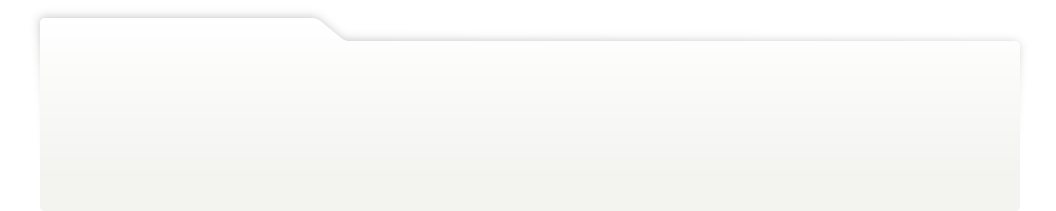
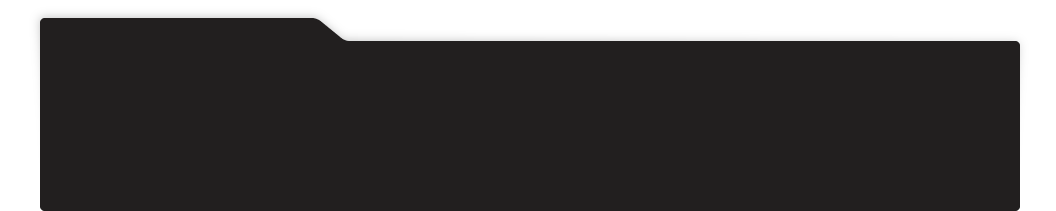
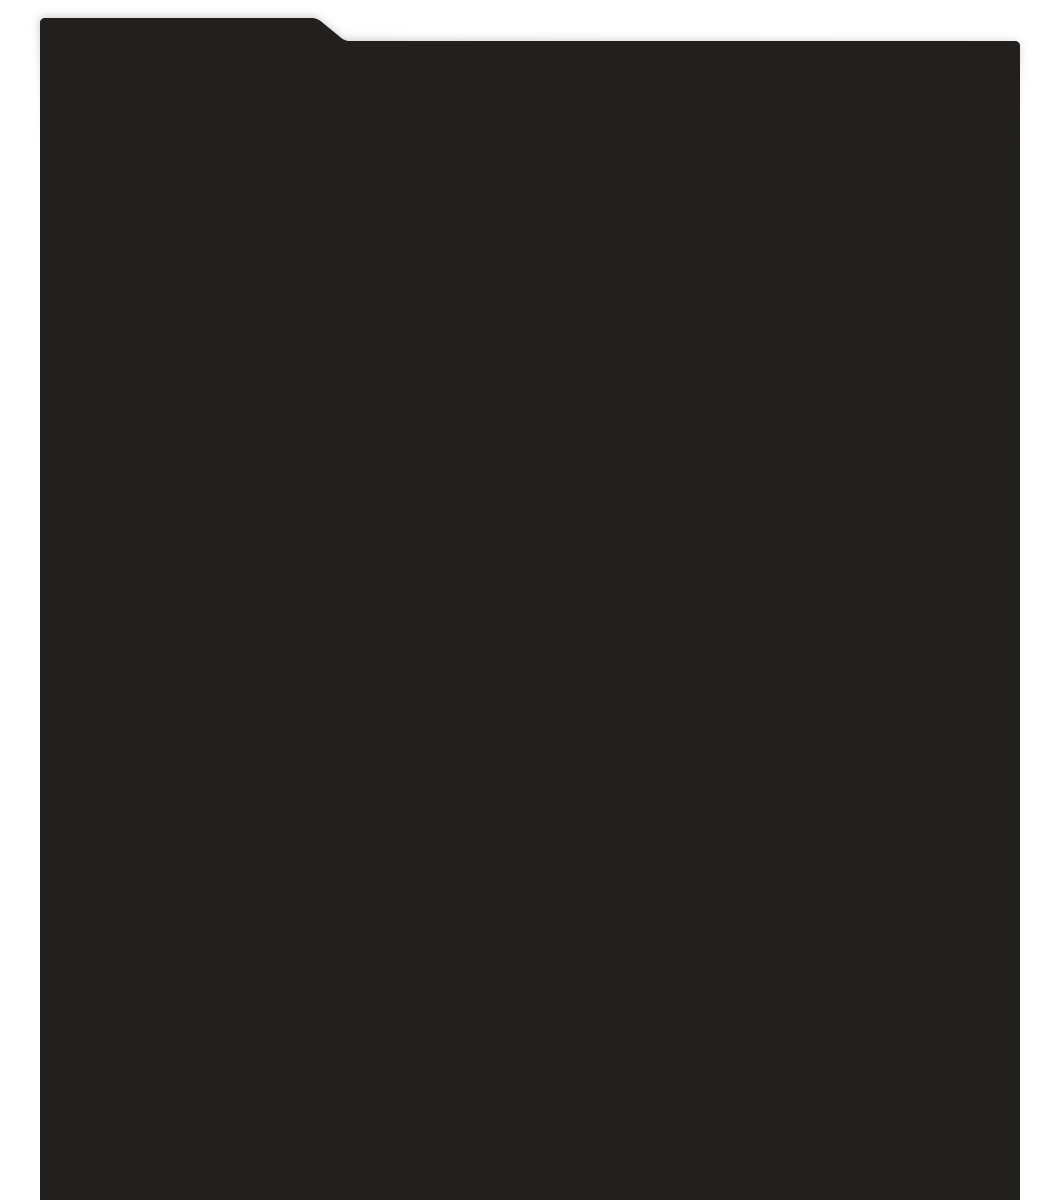
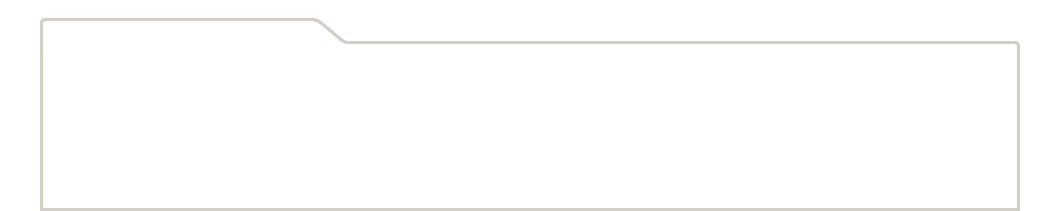
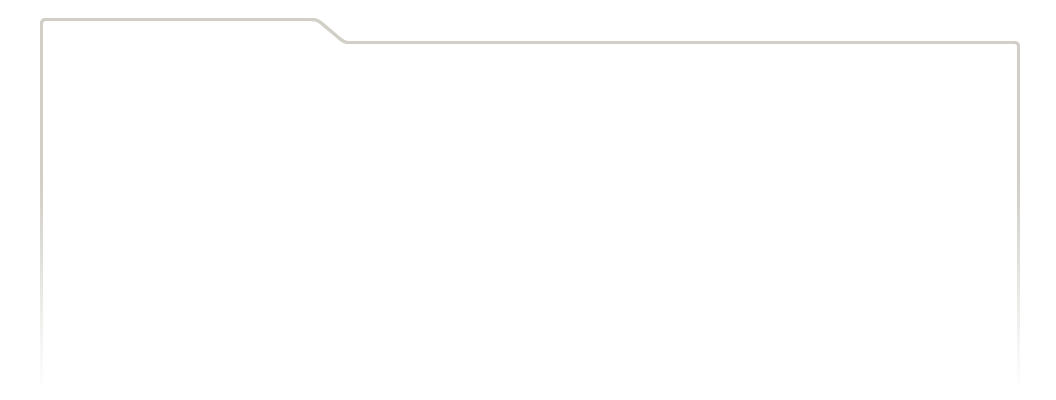
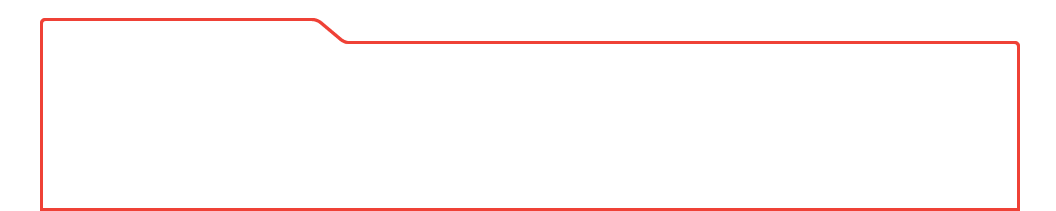
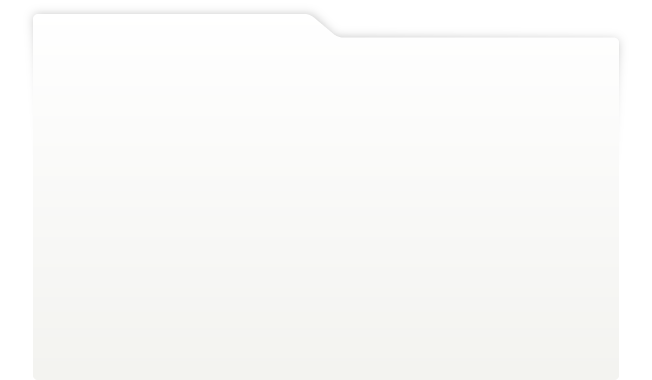
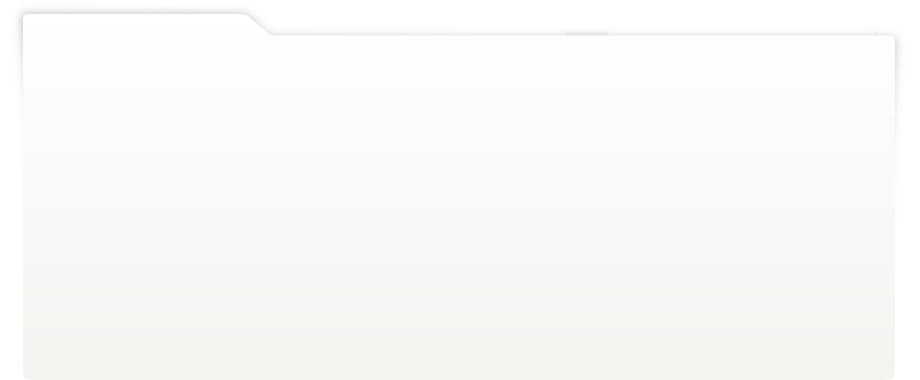
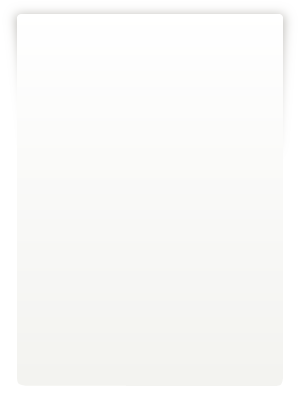
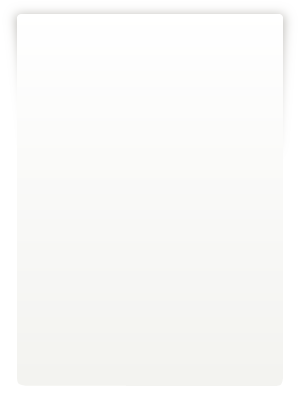
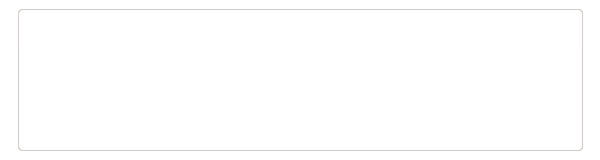
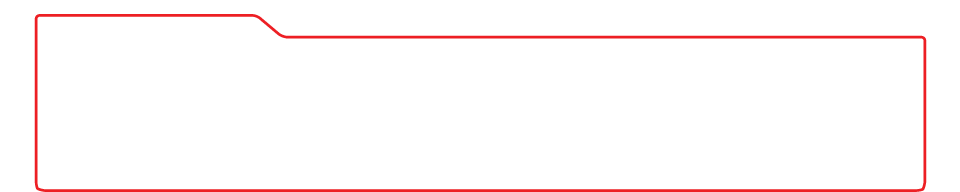
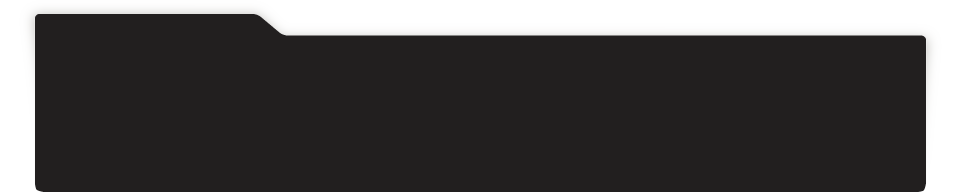
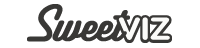
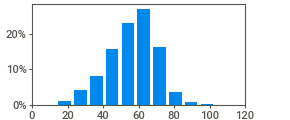
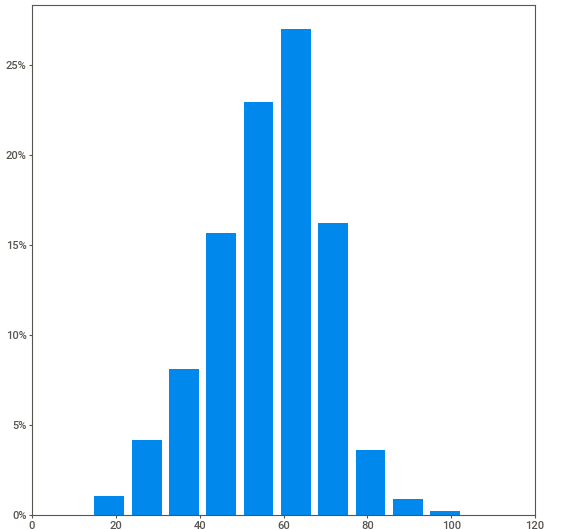
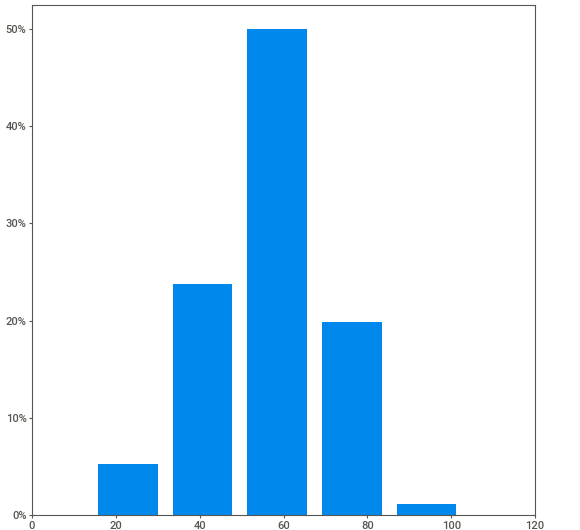
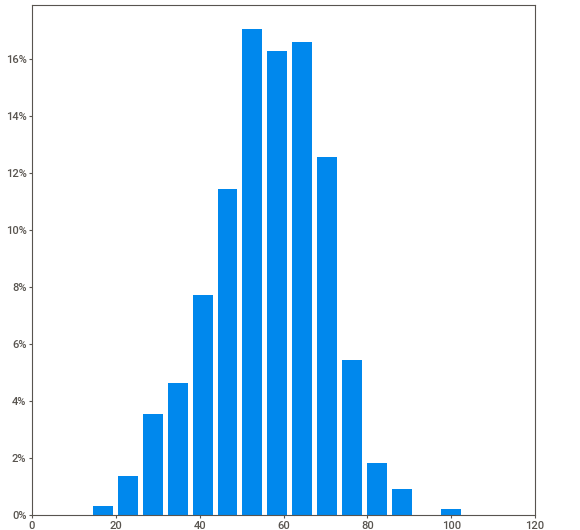
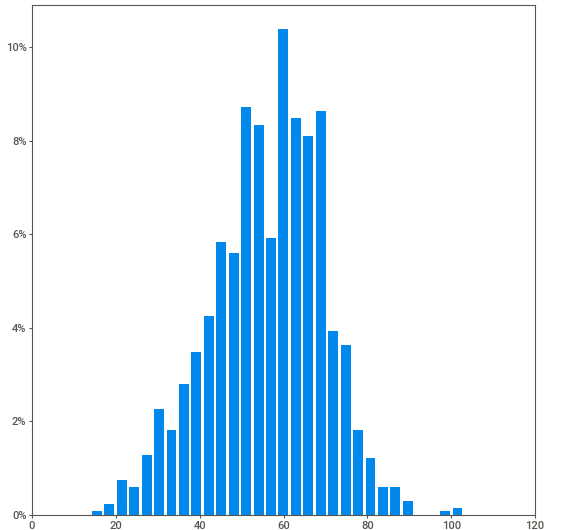
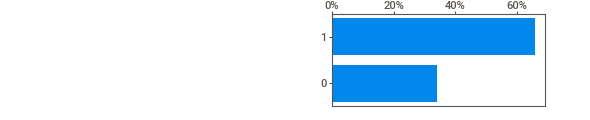
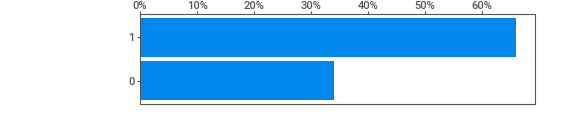
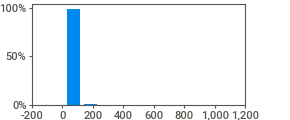
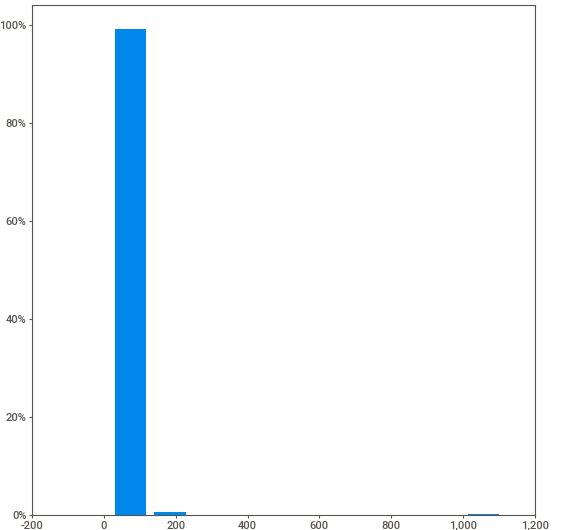
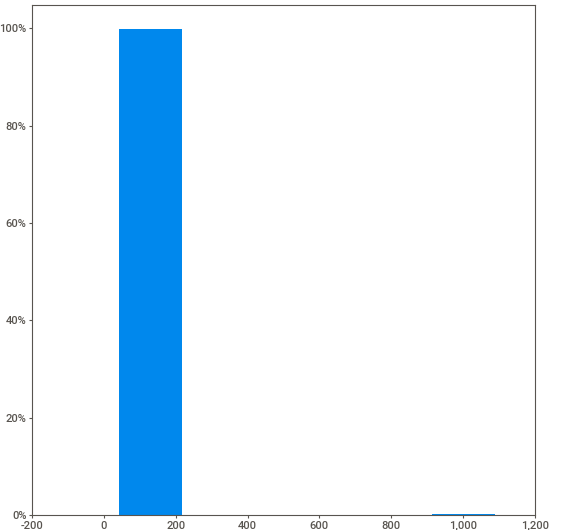
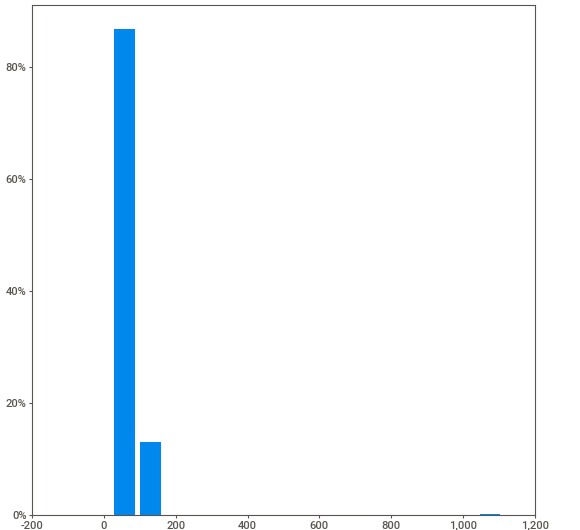
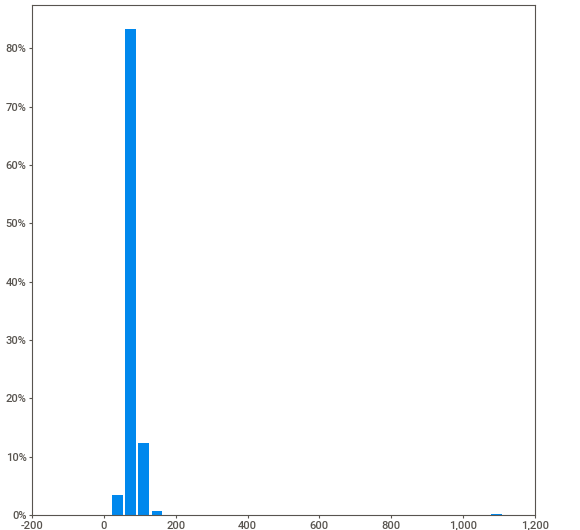
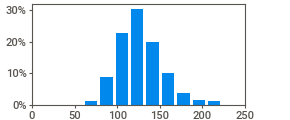
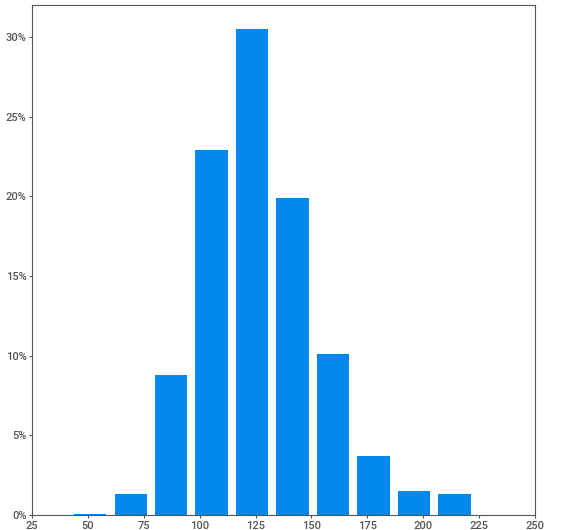
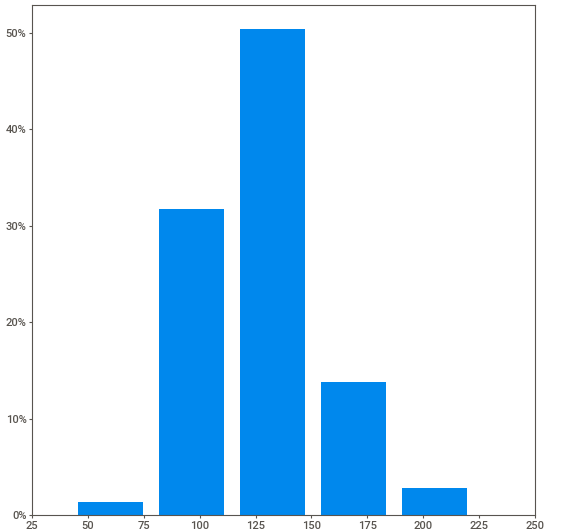
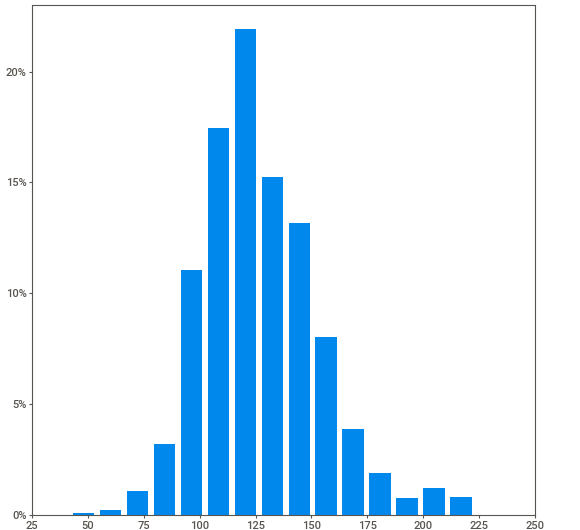
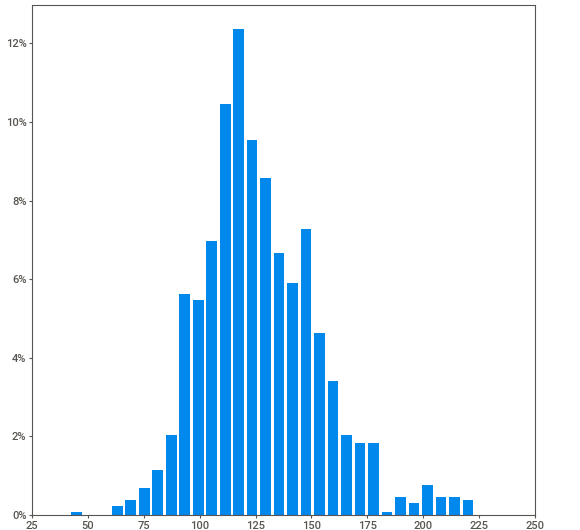
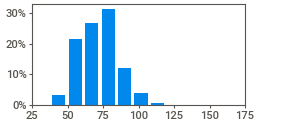
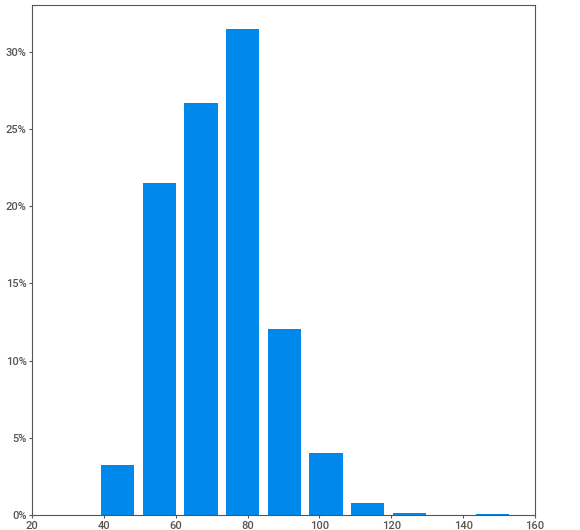
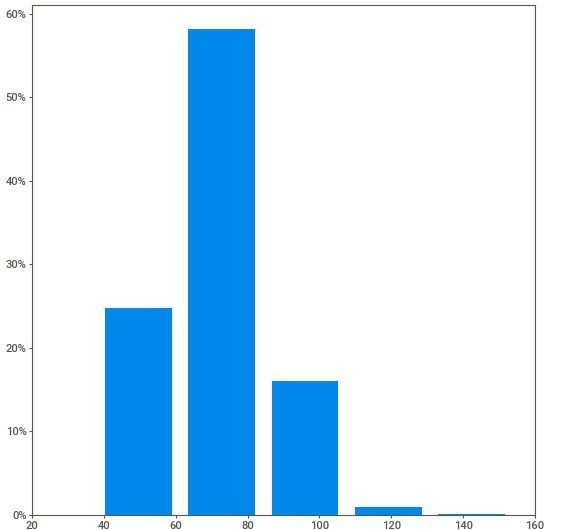
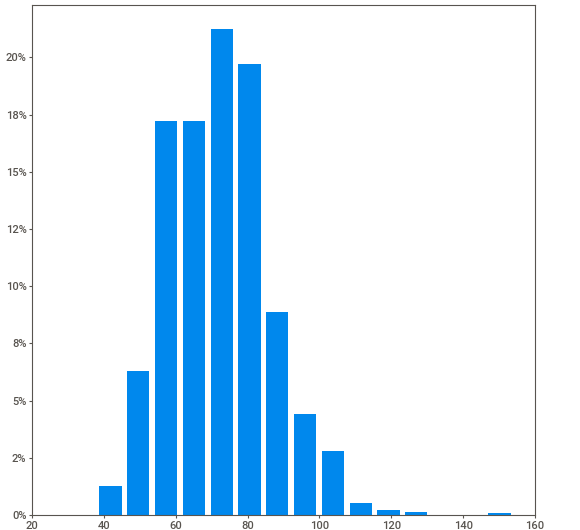
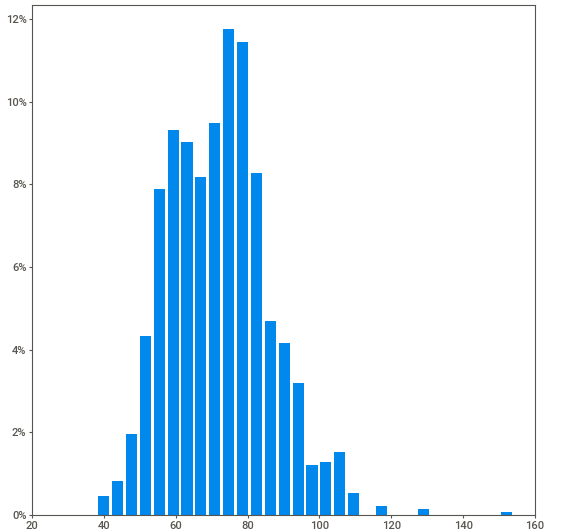
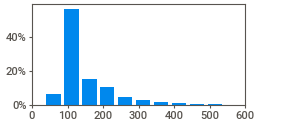
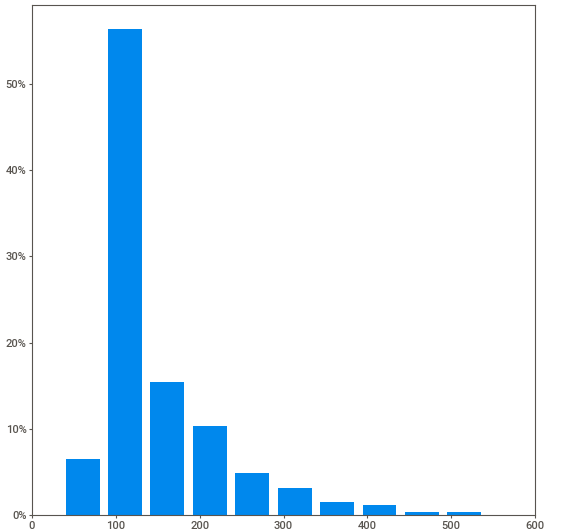
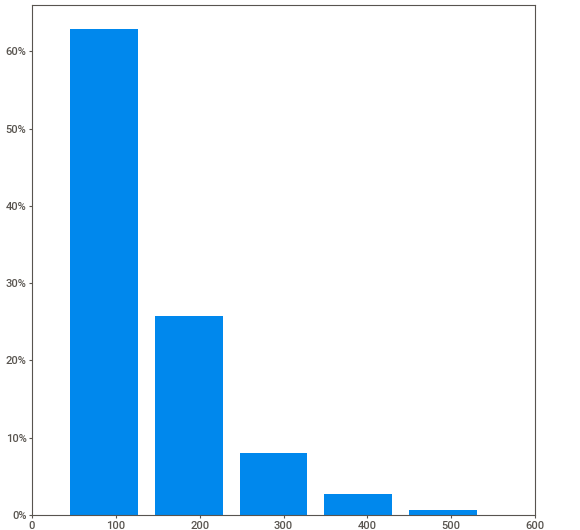
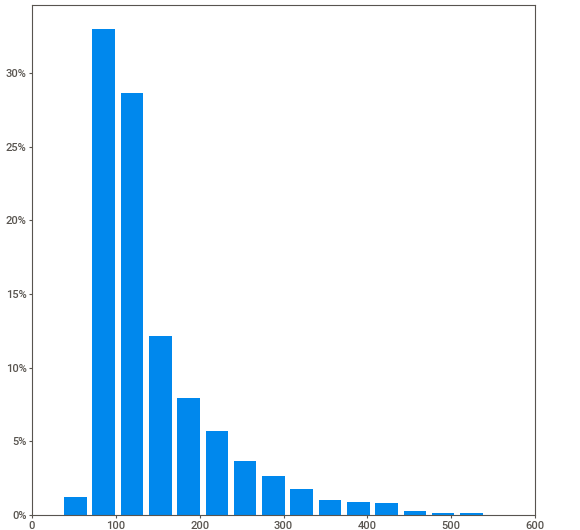
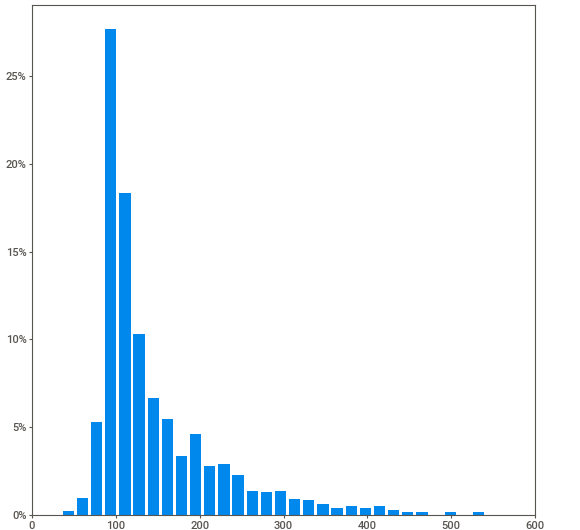
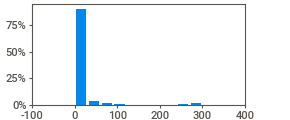
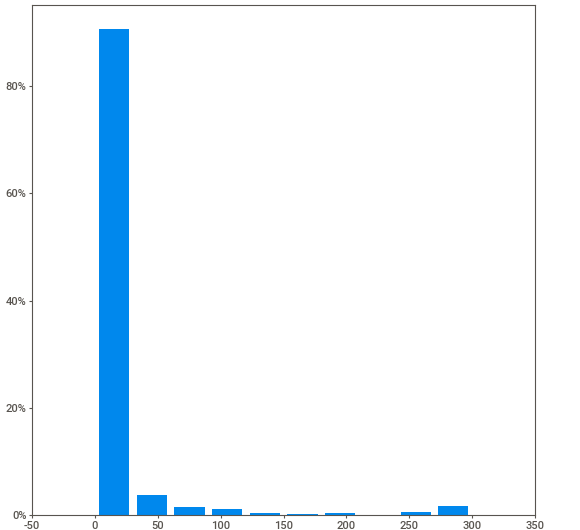
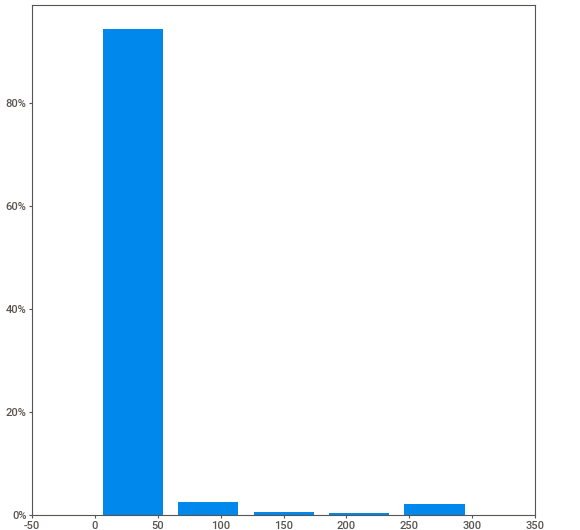
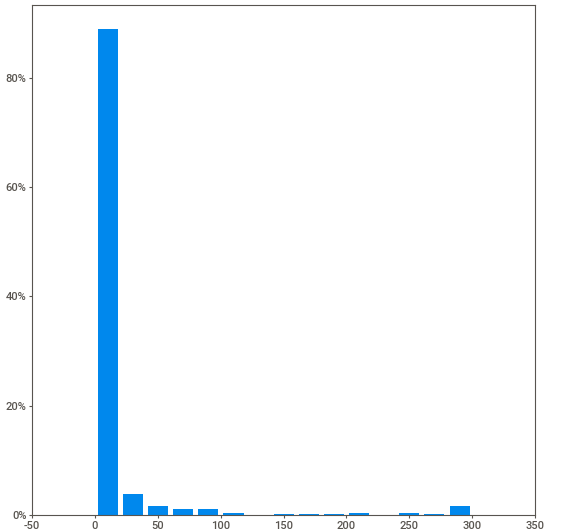
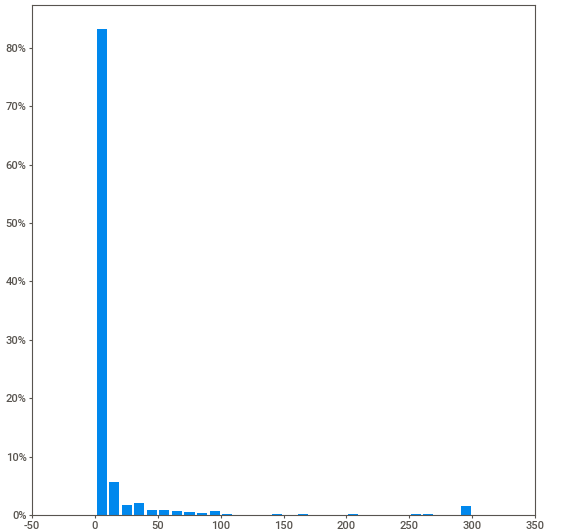
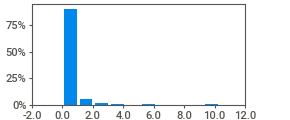
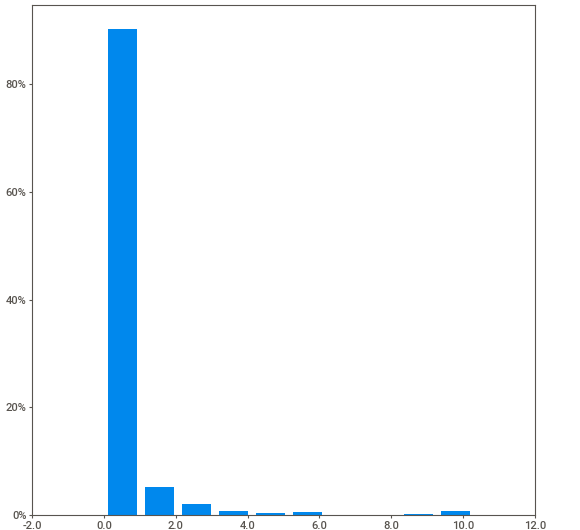
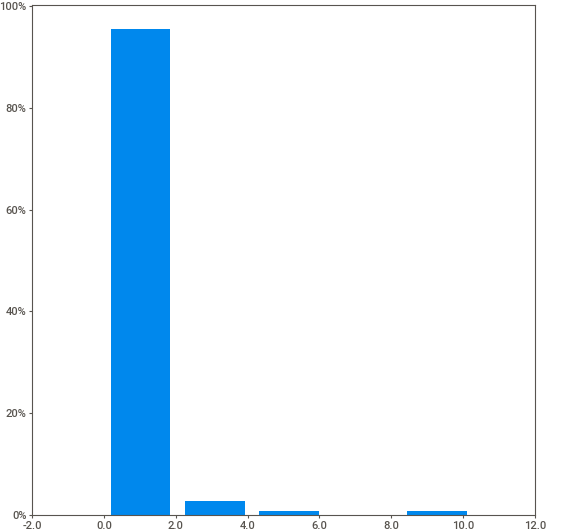
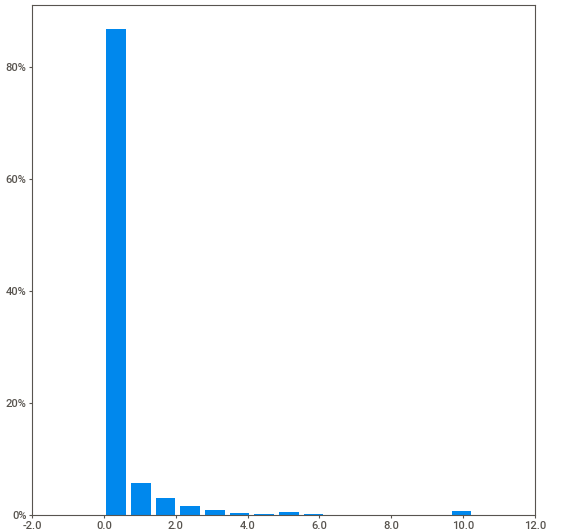
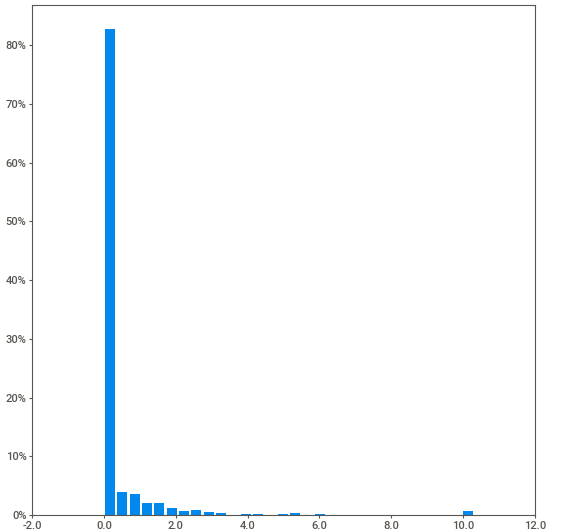
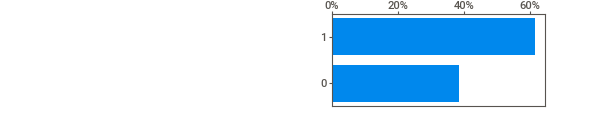
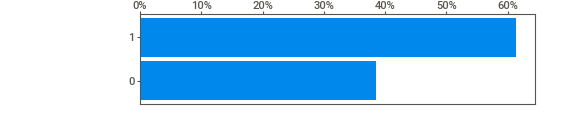
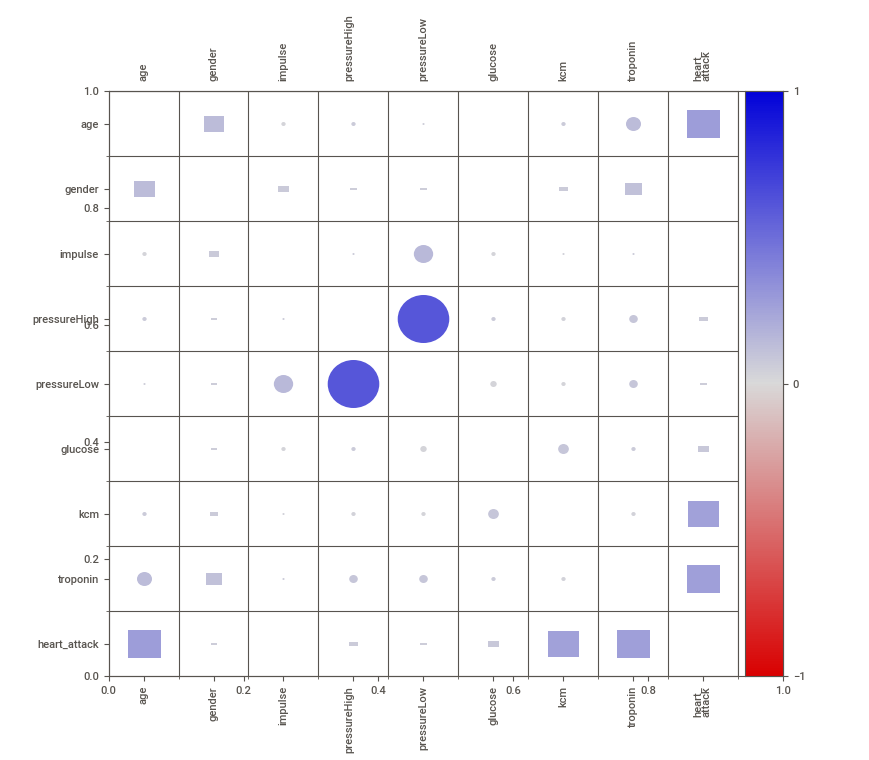
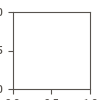

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
import sweetviz
sv = sweetviz.analyze(heartData);
sv.show_notebook()
sv.show_html()


#### OBSEVATION:

##### 1.AGE:
1. The age range between 14 to 103 years
2. The average age of patient is 56 years

##### 2.GENDER == [0:Female, 1:male]
1. Most patients (870) are Male (1), and 449 patients are female
2. Hence 66% are male and the remaining 34% are femal3

##### 3.IMPULSE:
1. The most frequent impulese range between 60 to 72
2. The maximum impulse is 1111 and the lowest is 
3. The average age of patient is 56 years

##### 4. HIGH BLOOD PRESSURE (pressureHigh):
1. The most obesrved High blood pressure is 138 to 150
2. maximum pressure is 223 and minimum is 42

##### 5. LOW BLOOD PRESSURE (pressureLow):
1. The most obesrved low pressure is between 69 to 75
2. maximum Low BP is 154 and minimum is 38

##### 6.GLUCOSE:
1. The most observed Glucose level is from 95 - 100
2. THe maximum Glucose level is 541, and the lowest 35

##### 7. KCM (Potasium, Calcium & Magnesium):
1. The most obesrved low KCM levels is between 1.29 to 300
2. maximum KCM level is 300 and minimum is 0.321

##### 8. Troponin:
1. The most obesrved low Troponin levels is between 0.003 to 0.017
2. maximum Tropinin level is 10.3 and minimum is 0.001

##### 9. HEART ATTACK  == TARGET VERIABLE [0:No heart disease, 1:heart disease]
1. Patients with b'positive are account to 61% which is 810 patients
2. patients with b'negative are account to 39% which is 509 patients

### Bivariate Analysis

#### Analysis on Categorical Variables with respect to the target variable (class)

In [15]:
heartData.head()

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


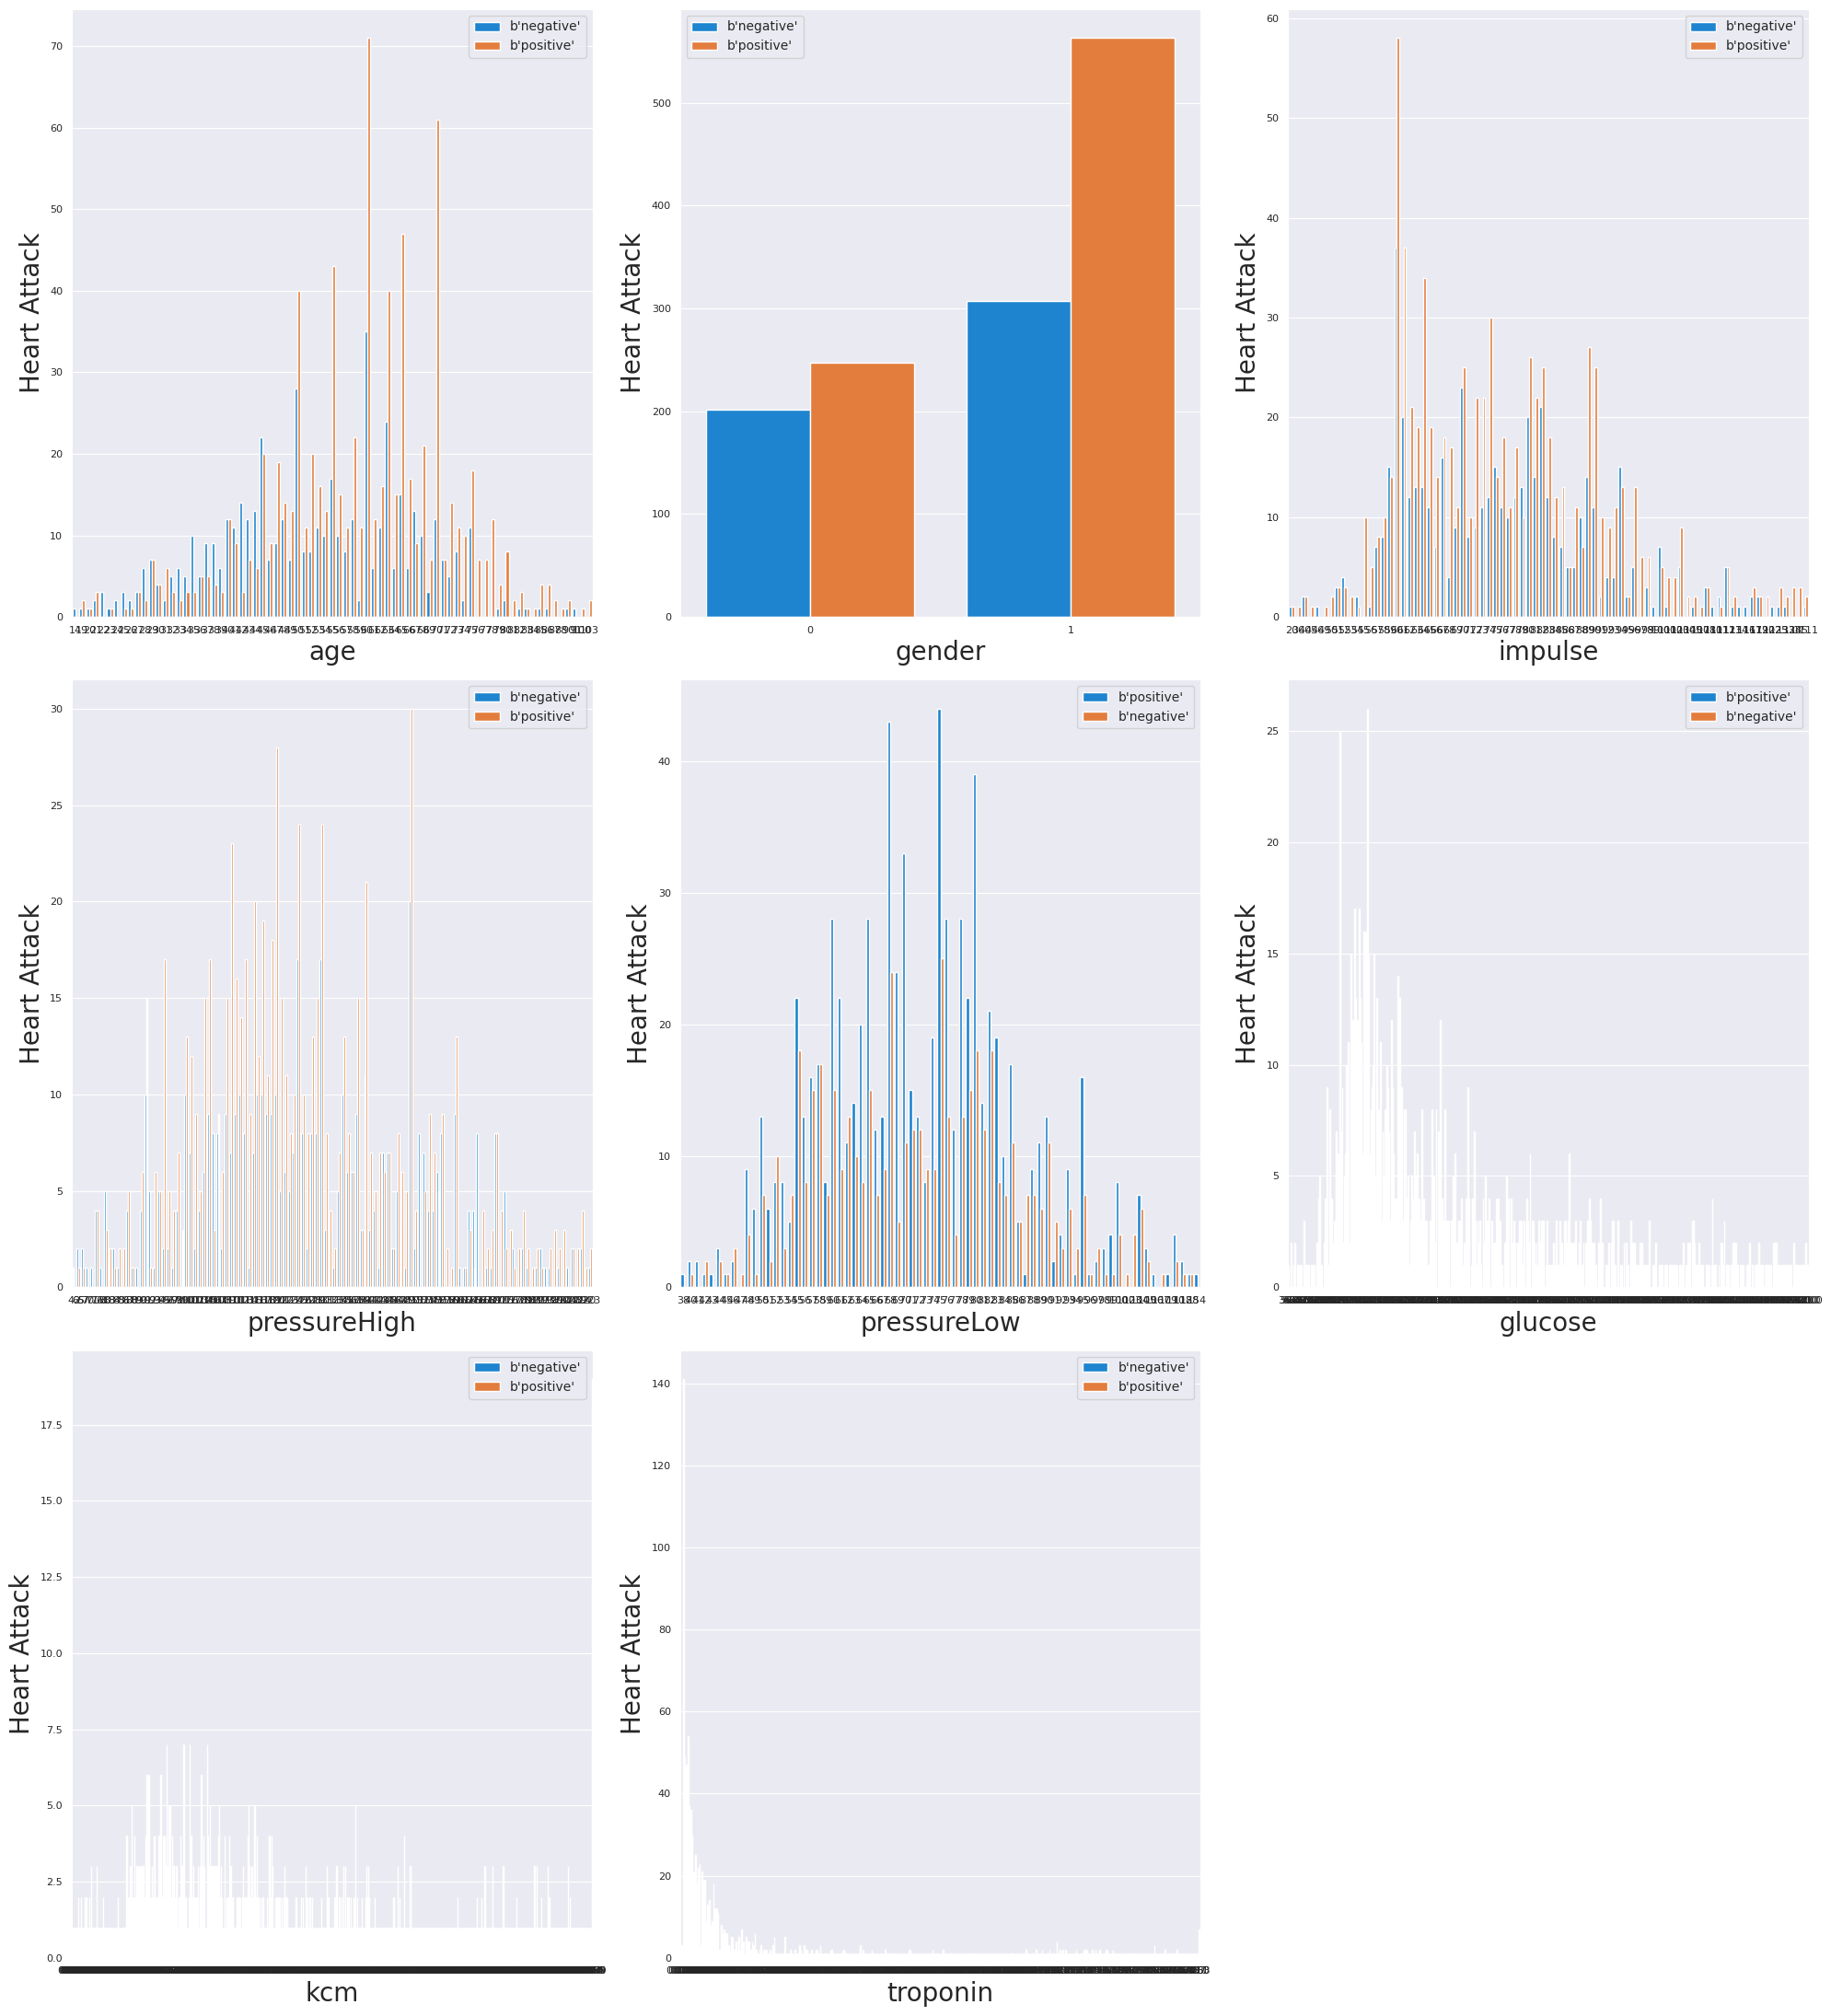

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your data
categorical = heartData[['age', 'gender', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']]
sns.set_style('darkgrid')

# Define the canvas size
plt.figure(figsize=(20, 22), facecolor='white')

plotnumber = 1

# Iterate through columns
for column in categorical:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        # Plotting countplot with hue as 'class'
        sns.countplot(x=categorical[column], hue=data['class'])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Heart Attack', fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


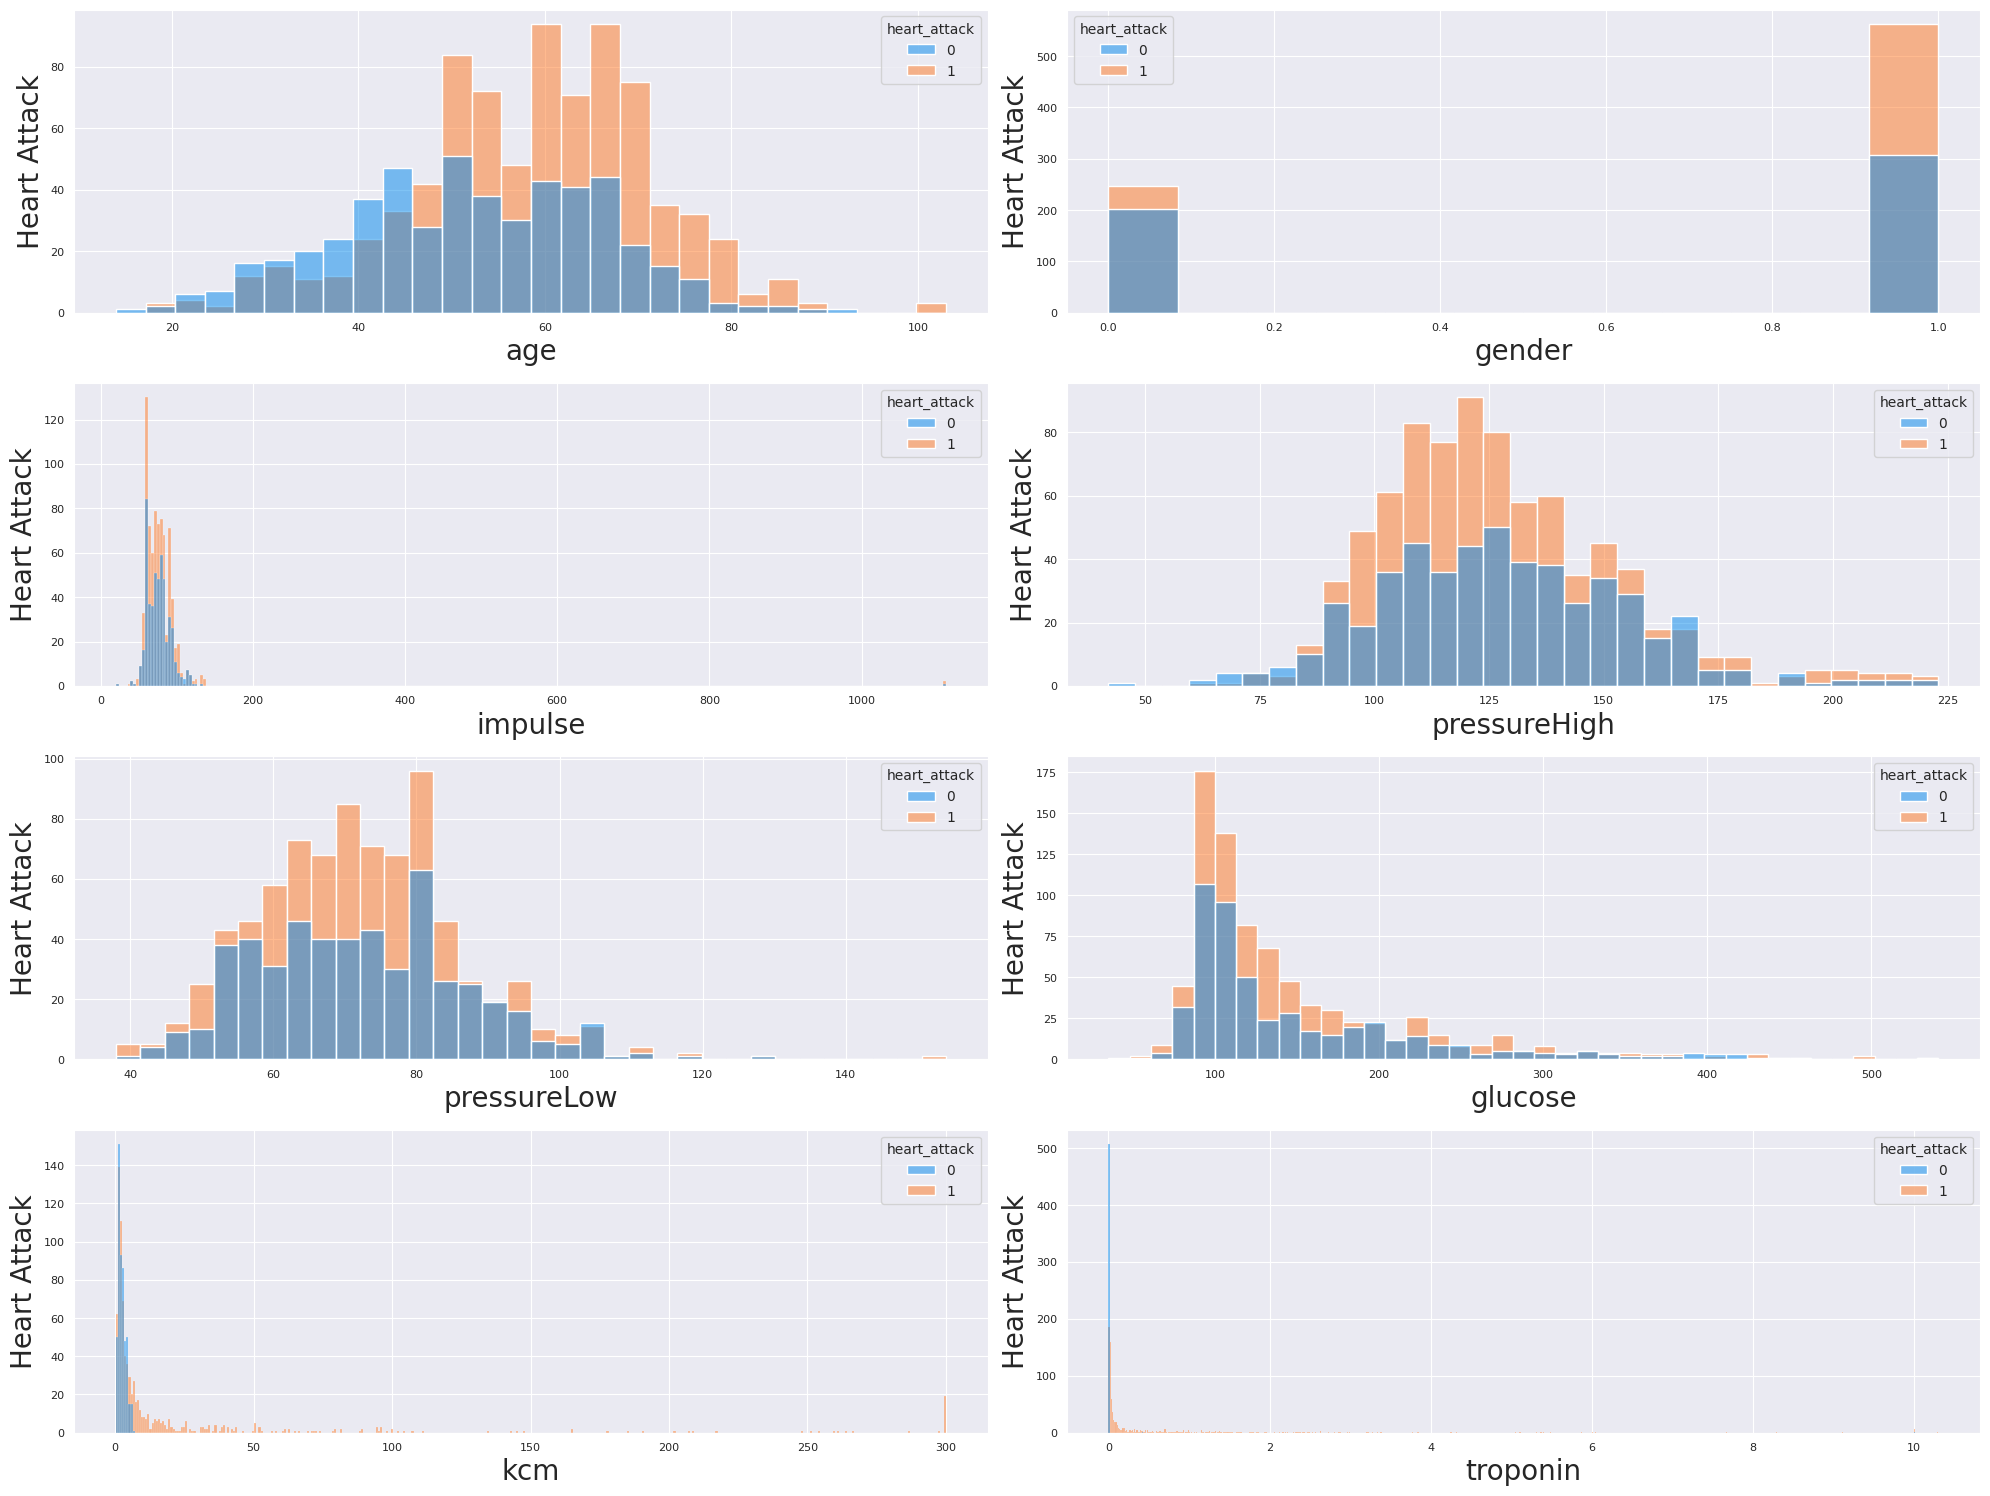

In [17]:
numerical = heartData[['age', 'gender', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from  dataset 
    if plotno<=9:    # set the limit
        plt.subplot(6,2,plotno) # # plotting 5 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.histplot(x=numerical[column],hue=heartData.heart_attack) # it give frequency hue =value counts
        plt.ylabel('Heart Attack',fontsize=20)# assigning name to y-axis and font size is 20
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

#### OBSERVATION:
##### 1.IMPACT OF RESTING BP TO HEART DISEASE:
1. If the blood pressure range between 110 to 150 the chance of heart disease is more 
2. If resting blood pressure is low the chance of heart disease is slightly less

##### 2.IMPACT OF SERUM CHOLESTREOL TO HEART DISEASE:
1. If serum cholestreol is less than 350 the heart disease chance is 50-50 percent.
2. serum cholestreol is more than 350 thier is no chance of heart disease

##### 3.IMPACT OF OLD PEAK DEPRESSION TO HEART DISEASE:
1. If old peak depression is less the chance of heart disease is less 
2. old peak depression is more than 1 the chance of heart disease is more

##### 4.IMAPCT OF AGE TO HEART DISEASE:
1. At the age of 60 the more chance of heart disease and age range between 40 to 70 heart disease chance is 50-50 percent
2. If age is less than 30 their is no chance of heart disease

##### 5.IMAPCT OF MAX HEART RATE TO HEART DISEASE:
1. If the heart rate is less than 140 the chance of heart disease is more
2. Above 140 heart rate chance of heart disease is 50-50 percent.
3. If the heart rate is more than 180 their is no chance of heart disease

In [18]:
heartData

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


## MULTIVARIATE ANALYSIS
### CHECKING THE RELATION OF TWO VARIABLES WITH RESPECT TO THE TARGET VARIABLES

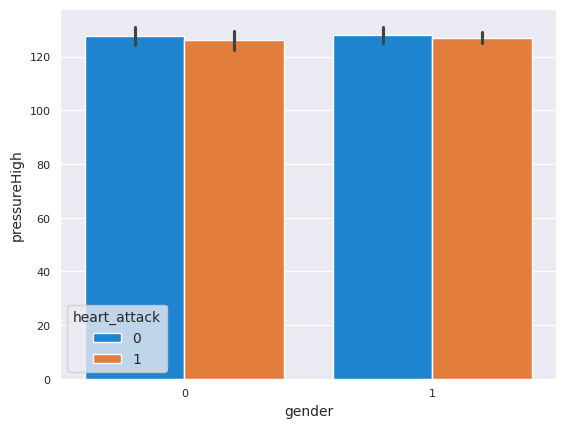

In [19]:
sns.barplot(x='gender',y='pressureHigh',hue=heartData.heart_attack,data=heartData)
plt.show()

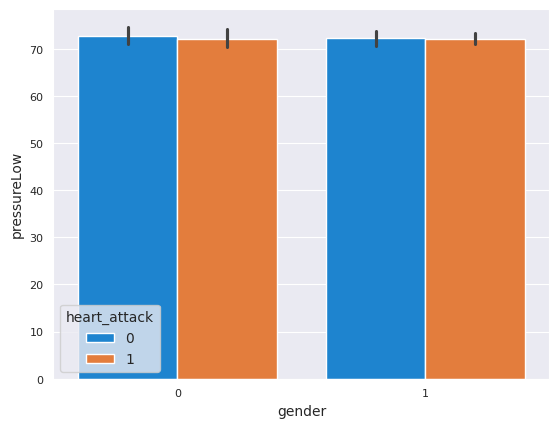

In [20]:
sns.barplot(x='gender',y='pressureLow',hue=heartData.heart_attack,data=heartData)
plt.show()

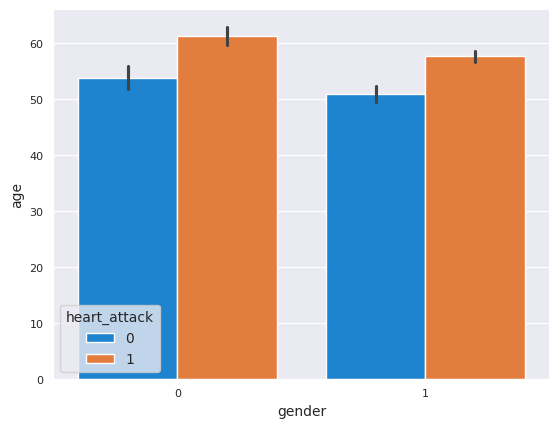

In [21]:
sns.barplot(x='gender',y='age',hue=heartData.heart_attack,data=heartData)
plt.show()

## DATA PREPROCESSING / FEATURE ENGINEERING

#### 1.CHECK MISSING VALUE

In [22]:
heartData.isnull().sum()

age             0
gender          0
impulse         0
pressureHigh    0
pressureLow     0
glucose         0
kcm             0
troponin        0
heart_attack    0
dtype: int64

- we have no null values

#### 2.CATEGORICAL DATA CONVERSION

##### MANUAL ENCODING
* Manual encoding is best technique to handle categorical data with the help of map function
* But we dont have a categorical data.

In [23]:
# checking the unique value of thal
heartData.heart_attack.unique()

array([0, 1])

## Outliers Handling

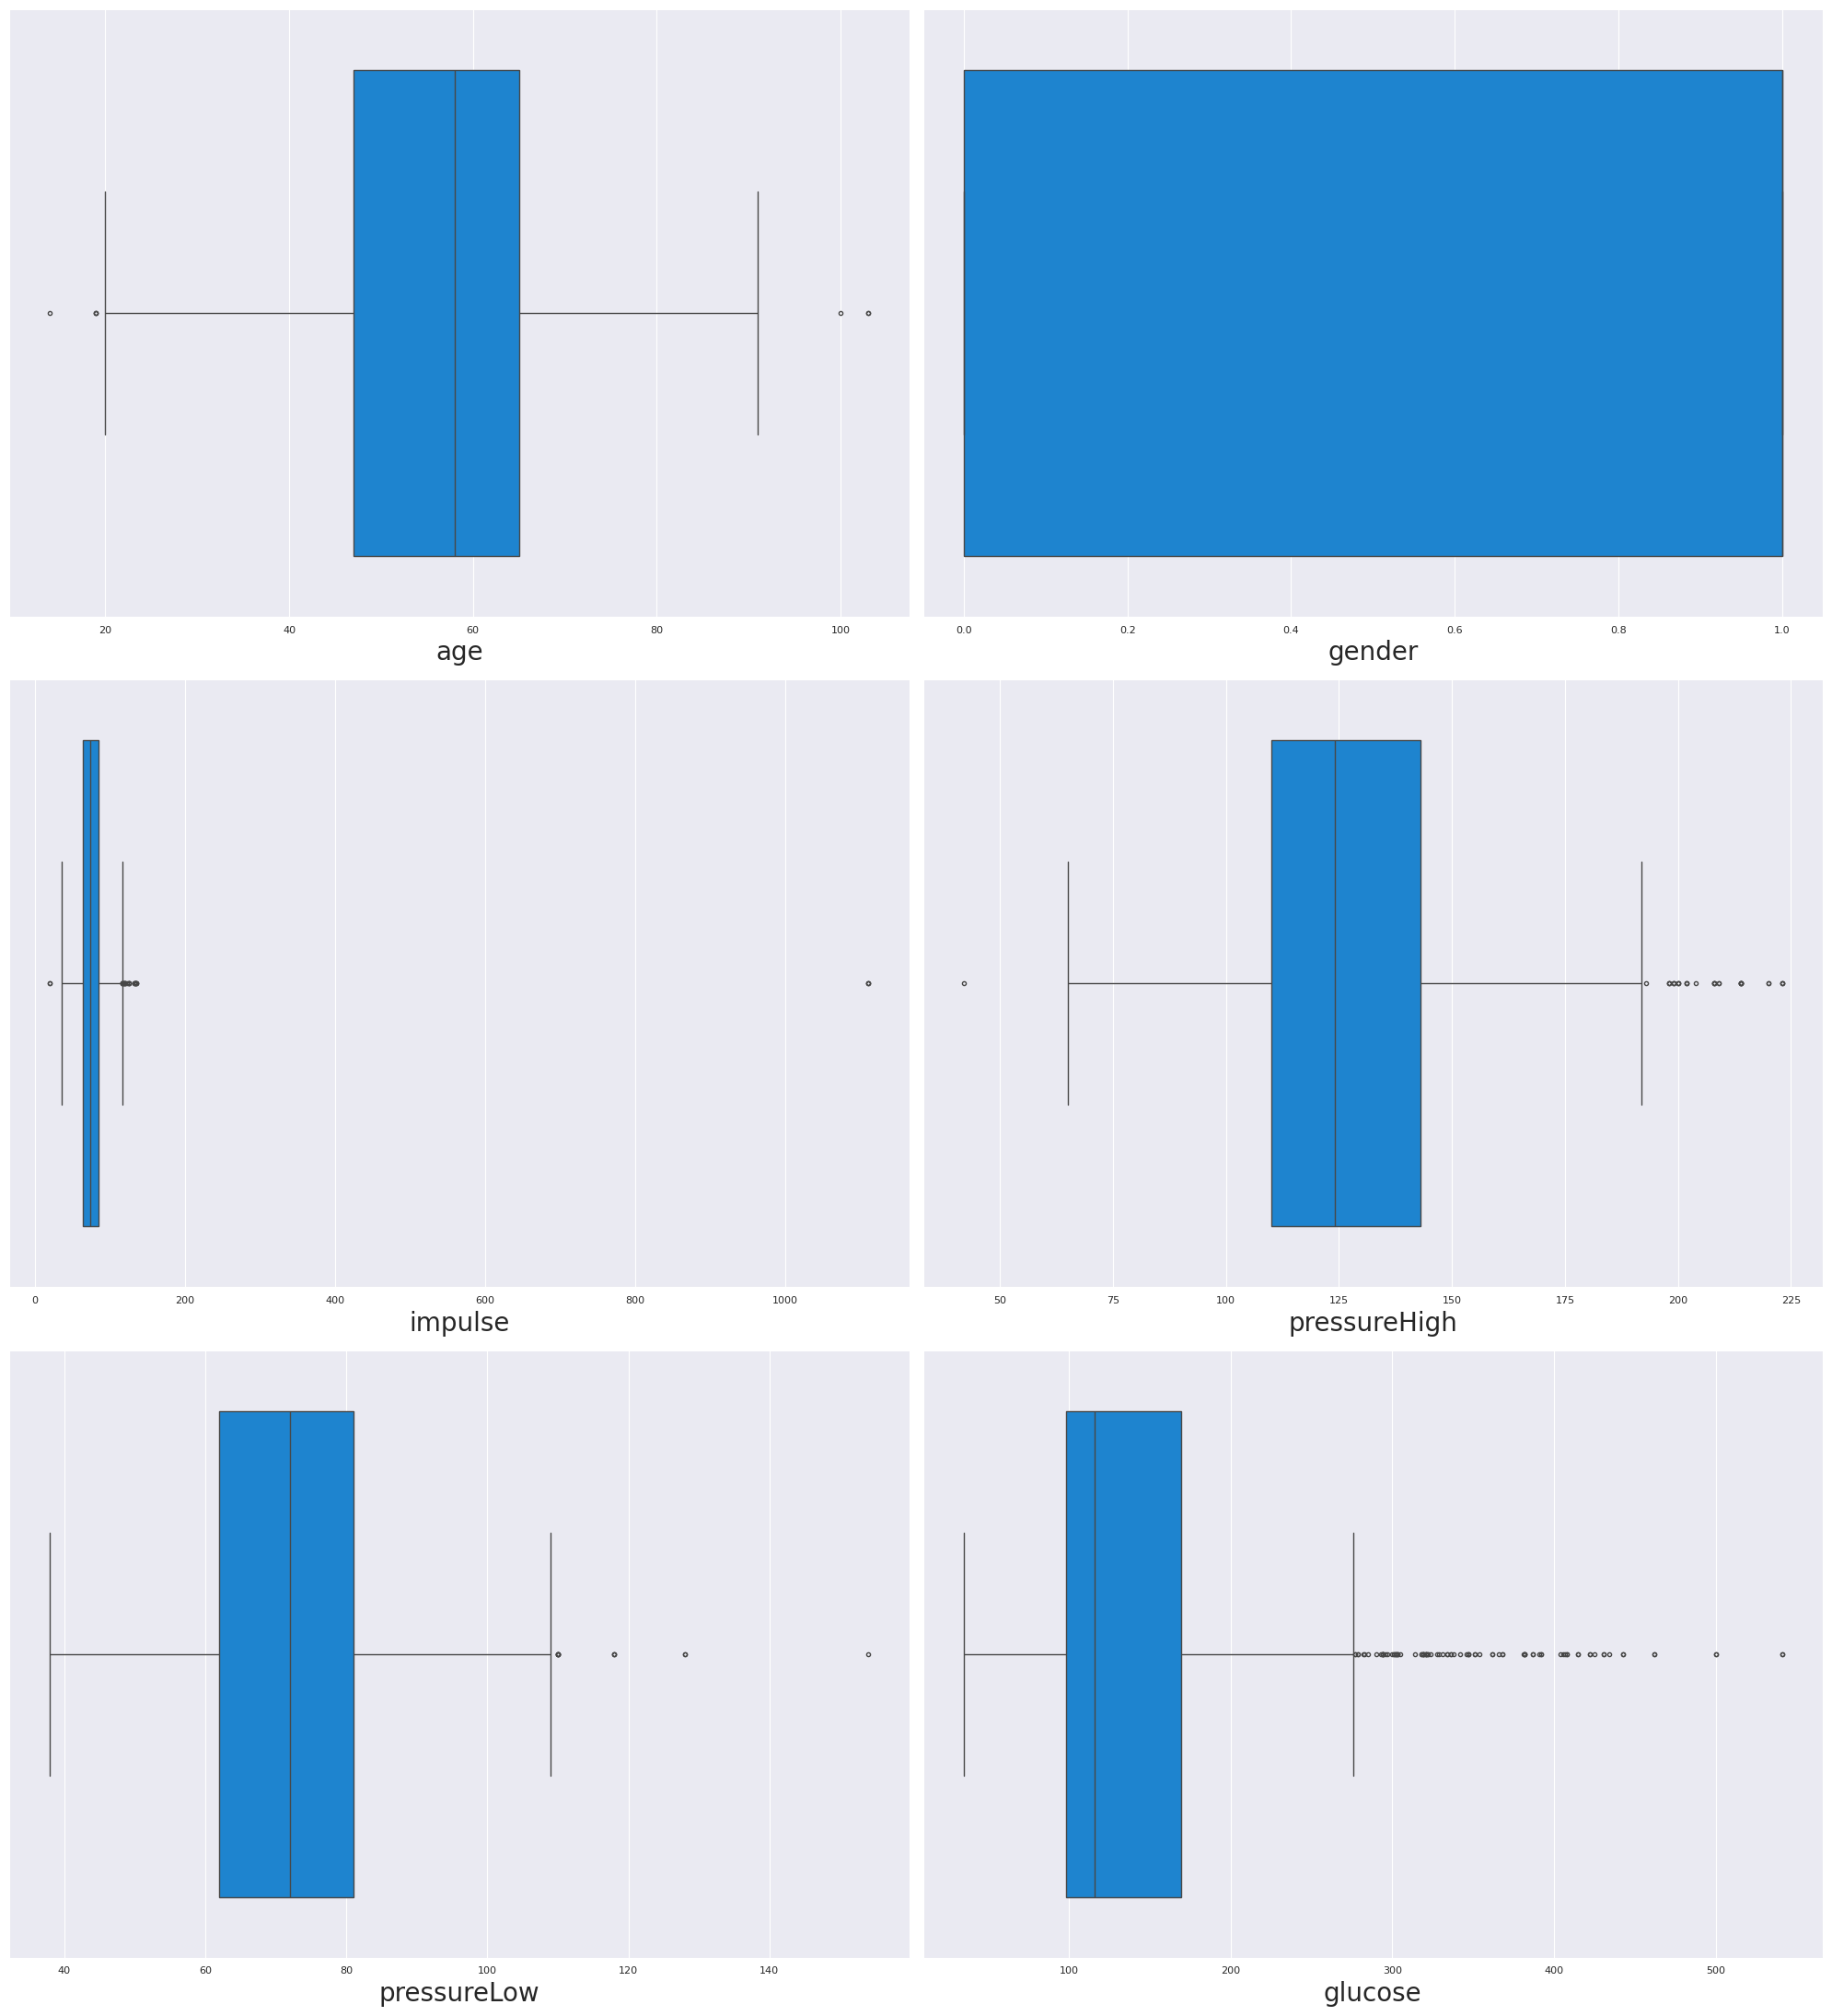

In [24]:
out = heartData[['age', 'gender', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 5 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.boxplot(x=out[column]) # Plotting box plots
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### CHECKING DISTRIBUTION BEFORE OUTLIERS HANDLING

/tmp/ipykernel_112952/2423016954.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out[column])  # Plotting dist plots
/tmp/ipykernel_112952/2423016954.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out[column])  # Plotting dist plots
/tmp/ipykernel_112952/2423016954.py:20: UserWarning:

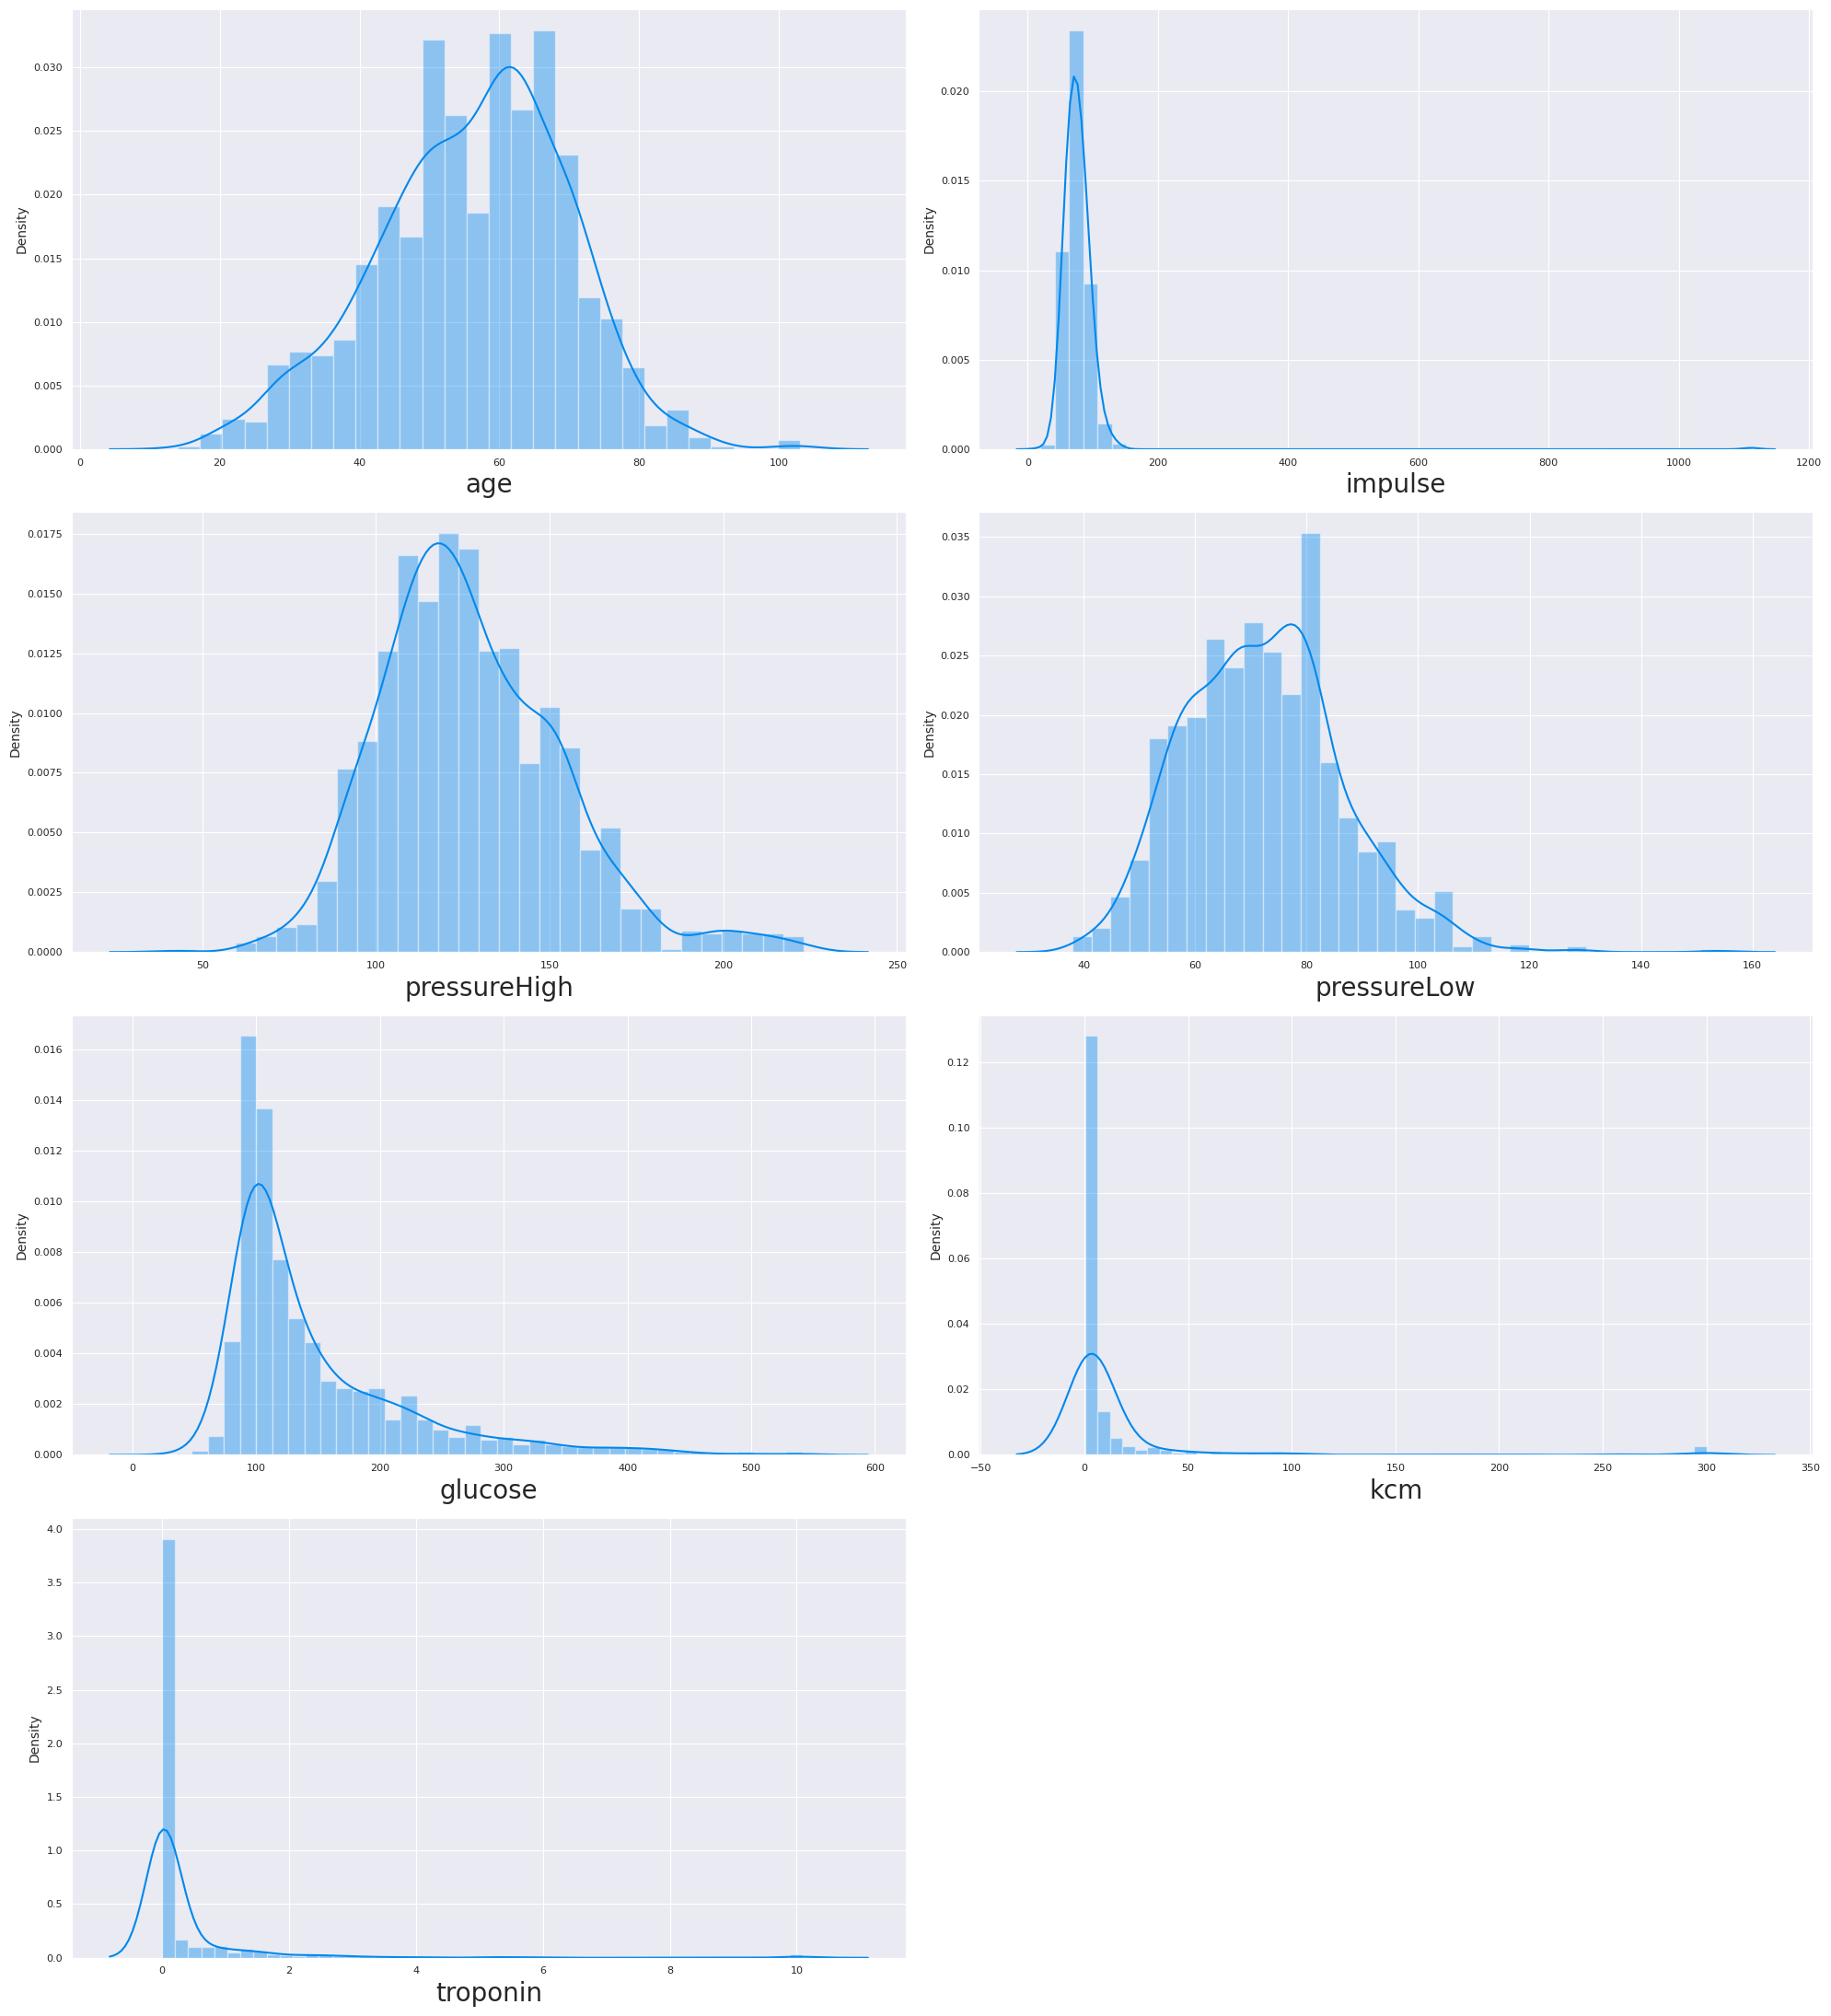

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns
out = heartData[['age', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']]

# Setting the style
sns.set_style('darkgrid')

# Defining the canvas size
plt.figure(figsize=(20, 22))

# Counter for plotting
plotno = 1

# Iterating through columns
for column in out:
    if plotno <= 7:
        plt.subplot(4, 2, plotno)  # Plotting 7 graphs (4-rows, 2-columns)
        sns.distplot(out[column])  # Plotting dist plots
        plt.xlabel(column, fontsize=20)
    plotno += 1

plt.tight_layout()
plt.show()


## 1. KCM
- IQR

In [26]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(heartData['kcm'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = heartData['kcm'].quantile(0.25)  # first quantile
Q3 = heartData['kcm'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 4.15
minimum limit -4.57
maximum limit 12.030000000000001


In [27]:
# Step:3 Filtering the data
heartData.loc[heartData['kcm'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


In [28]:
heartData.loc[heartData['kcm'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
3,64,1,70,120,55,270.0,13.87,0.122,1
7,63,1,60,214,82,87.0,300.00,2.370,1
21,48,1,135,98,60,100.0,94.79,0.004,1
23,30,1,63,110,68,107.0,50.46,0.003,1
24,50,1,63,104,63,269.0,38.72,0.612,1
...,...,...,...,...,...,...,...,...,...
1291,58,1,98,91,50,182.0,15.23,0.013,1
1294,50,0,79,92,55,415.0,16.95,0.005,1
1306,60,0,78,109,69,230.0,19.47,0.003,1
1309,47,1,94,105,81,135.0,36.24,0.263,1


In [29]:
# Step:4 Imputation of outlier
heartData.loc[heartData['kcm'] > max_limit ,'kcm']=np.median(heartData['kcm'])

In [30]:
heartData.loc[heartData['kcm'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


### 2. GLUCOSE
- IQR

In [31]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(heartData['glucose'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = heartData['glucose'].quantile(0.25)  # first quantile
Q3 = heartData['glucose'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 71.5
minimum limit -9.25
maximum limit 276.75


In [32]:
# Step:3 Filtering the data
heartData.loc[heartData['glucose'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


In [33]:
# Step:3 Filtering the data
heartData.loc[heartData['glucose'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
1,21,1,94,98,46,296.0,6.750,1.060,1
4,55,1,64,112,65,300.0,1.080,0.003,0
14,47,1,76,120,70,319.0,2.570,0.003,0
20,60,1,92,151,78,301.0,1.600,0.005,0
28,47,0,66,134,57,279.0,2.850,0.007,1
...,...,...,...,...,...,...,...,...,...
1267,60,0,60,209,75,500.0,1.490,0.019,1
1274,70,1,103,126,75,541.0,0.665,0.014,0
1294,50,0,79,92,55,415.0,2.850,0.005,1
1310,70,0,80,135,75,351.0,2.210,10.000,1


In [34]:
# Step:4 Imputation of outlier
heartData.loc[heartData['glucose'] > max_limit ,'glucose']=np.median(heartData['glucose'])

In [35]:
# Step:3 Filtering the data
heartData.loc[heartData['glucose'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


### 3. HIGH PRESSURE
- IQR

In [36]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(heartData['pressureHigh'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = heartData['pressureHigh'].quantile(0.25)  # first quantile
Q3 = heartData['pressureHigh'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 33.0
minimum limit 60.5
maximum limit 192.5


In [37]:
# Step:3 Filtering the data
heartData.loc[heartData['pressureHigh'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
209,60,1,68,42,64,106.0,0.879,0.426,0


In [38]:
# Step:3 Filtering the data
heartData.loc[heartData['pressureHigh'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
7,63,1,60,214,82,87.0,2.850,2.370,1
12,64,1,60,199,99,92.0,3.430,5.370,1
89,61,1,60,202,88,111.0,0.633,6.050,1
186,62,0,61,193,86,96.0,2.990,0.004,0
220,60,0,110,220,128,101.0,1.280,0.002,0
311,63,1,74,208,100,100.0,2.540,0.145,1
411,74,0,90,198,48,102.0,2.850,0.052,1
427,58,0,69,214,88,95.0,2.850,0.011,1
428,21,1,85,204,84,93.0,2.710,0.002,0
429,44,0,65,200,80,261.0,2.850,0.004,1


In [39]:
# Step:4 Imputation of outlier
heartData.loc[heartData['pressureHigh'] > max_limit ,'pressureHigh']=np.median(heartData['pressureHigh'])

In [40]:
# Step:3 Filtering the data
heartData.loc[heartData['pressureHigh'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


In [41]:
# Step:4 Imputation of outlier
heartData.loc[heartData['pressureHigh'] < min_limit ,'pressureHigh']=np.median(heartData['pressureHigh'])

In [42]:
# Step:3 Filtering the data
heartData.loc[heartData['pressureHigh'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


### 4. Low PRESSURE
- IQR

In [43]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(heartData['pressureLow'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = heartData['pressureLow'].quantile(0.25)  # first quantile
Q3 = heartData['pressureLow'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 19.0
minimum limit 33.5
maximum limit 109.5


In [44]:
# Step:3 Filtering the data
heartData.loc[heartData['pressureLow'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


In [45]:
# Step:3 Filtering the data
heartData.loc[heartData['pressureLow'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
179,68,1,67,191,110,165.0,2.580,0.010,0
220,60,0,110,124,128,101.0,1.280,0.002,0
404,72,1,79,159,110,175.0,2.920,1.550,1
486,63,1,74,124,118,161.0,2.970,0.628,1
645,47,0,81,124,110,97.0,2.850,0.959,1
670,51,1,74,124,118,105.0,1.600,0.004,0
893,54,0,65,191,110,140.0,2.590,0.540,1
969,63,1,81,124,110,208.0,2.500,0.009,0
999,29,0,74,124,118,86.0,4.930,0.003,1
1203,65,1,77,76,154,93.0,3.810,0.029,1


In [46]:
# Step:4 Imputation of outlier
heartData.loc[heartData['pressureLow'] > max_limit ,'pressureLow']=np.median(heartData['pressureLow'])

In [47]:
# Step:3 Filtering the data
heartData.loc[heartData['pressureLow'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


/tmp/ipykernel_112952/2059121850.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=out[column]) # Plotting dist plots
/tmp/ipykernel_112952/2059121850.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=out[column]) # Plotting dist plots
/tmp/ipykernel_112952/2059121850.py:9: UserWarning: 

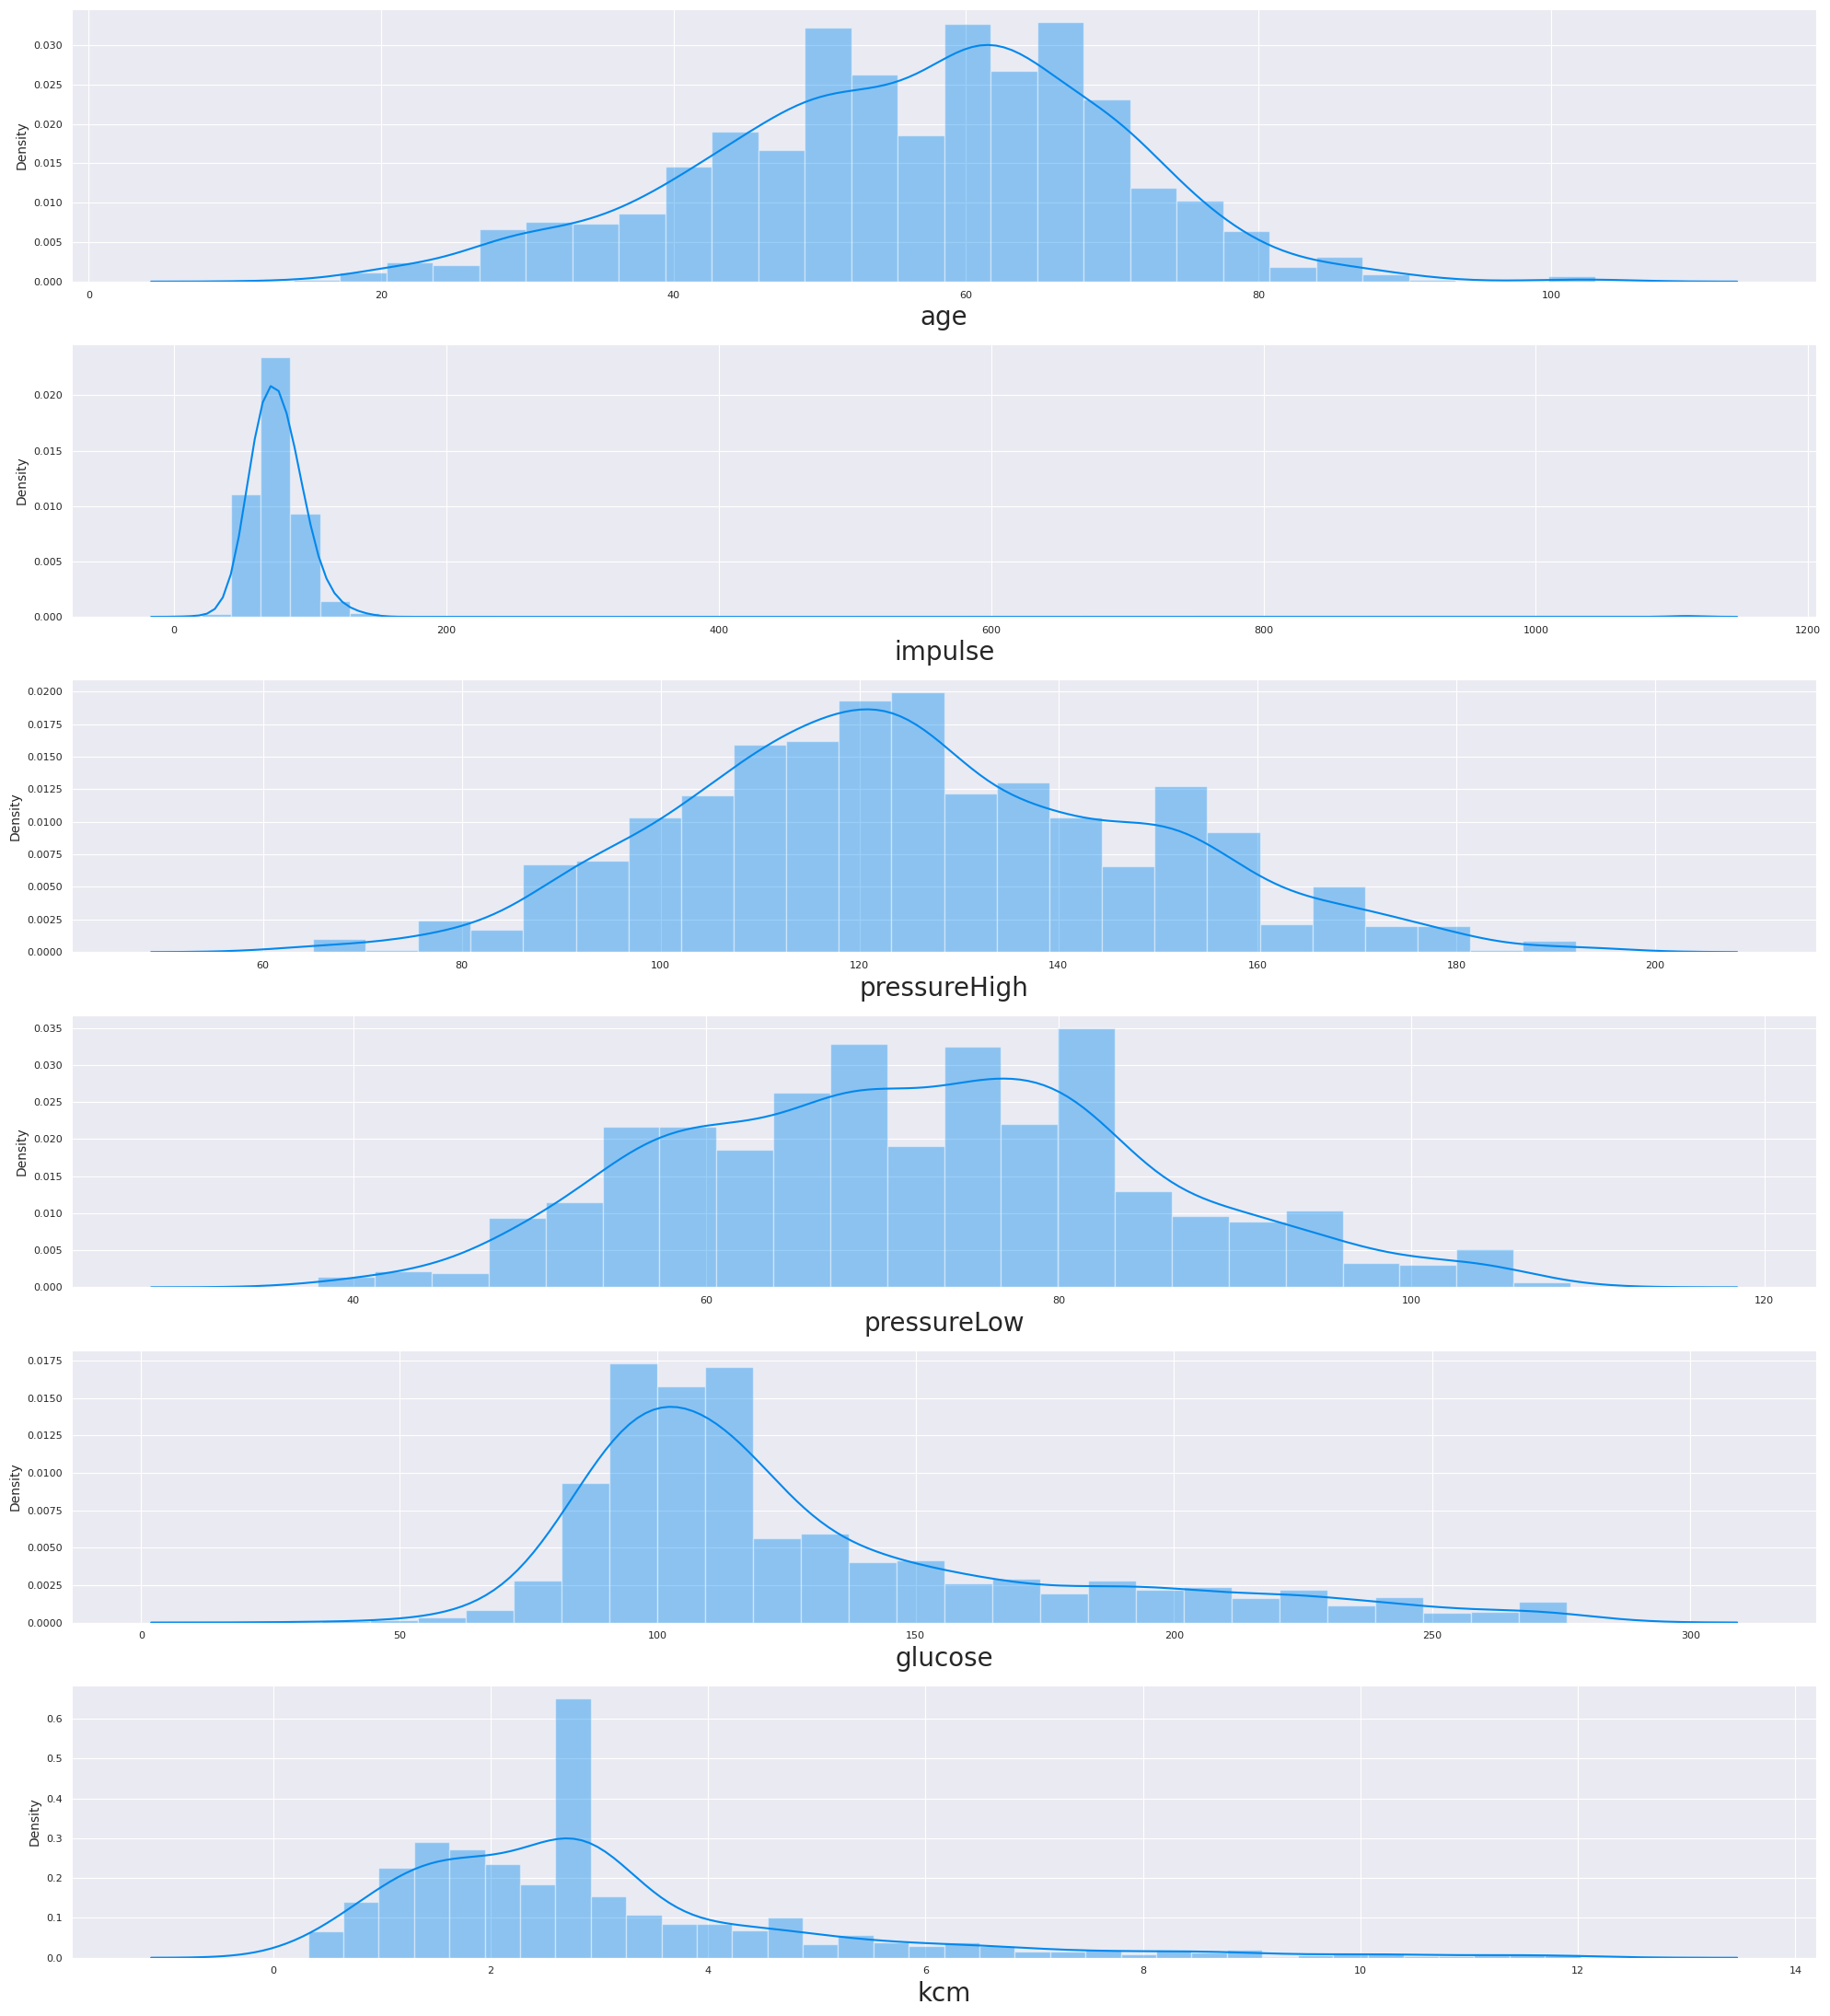

In [48]:
out = heartData[['age','impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']]
sns.set_style('darkgrid')
plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from  dataset 
    if plotno<=6:    # set the limit
        plt.subplot(6,1,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.distplot(x=out[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### 4. IMPULSE
- IQR

In [49]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(heartData['impulse'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = heartData['impulse'].quantile(0.25)  # first quantile
Q3 = heartData['impulse'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 21.0
minimum limit 32.5
maximum limit 116.5


In [50]:
# Step:3 Filtering the data
heartData.loc[heartData['impulse'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
708,42,1,20,110,90,108.0,4.93,0.01,0
1060,63,0,20,110,90,122.0,0.68,1.51,1


In [51]:
# Step:3 Filtering the data
heartData.loc[heartData['impulse'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
21,48,1,135,98,60,100.0,2.850,0.004,1
30,54,1,125,131,82,95.0,1.310,8.300,1
63,45,1,1111,141,95,109.0,1.330,1.010,1
125,47,1,125,121,60,89.0,2.270,0.392,1
221,63,1,120,140,90,100.0,2.850,0.031,1
222,55,1,122,147,95,96.0,3.860,0.005,0
223,63,1,119,170,107,129.0,2.610,0.005,0
287,44,0,117,112,74,113.0,2.640,0.009,0
346,60,1,134,111,69,163.0,3.080,0.025,1
351,69,1,119,113,79,184.0,8.870,0.005,1


In [52]:
# Step:4 Imputation of outlier
heartData.loc[heartData['impulse'] > max_limit ,'impulse']=np.median(heartData['impulse'])

In [53]:
# Step:4 Imputation of outlier
heartData.loc[heartData['impulse'] < min_limit ,'impulse']=np.median(heartData['impulse'])

In [54]:
# Step:3 Filtering the data
heartData.loc[heartData['impulse'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


In [55]:
# Step:3 Filtering the data
heartData.loc[heartData['impulse'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


### 4. IMPULSE
- IQR

In [56]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(heartData['age'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = heartData['age'].quantile(0.25)  # first quantile
Q3 = heartData['age'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 18.0
minimum limit 20.0
maximum limit 92.0


In [57]:
# Step:3 Filtering the data
heartData.loc[heartData['age'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
97,19,0,62,114,69,240.0,2.850,0.004,1
500,19,0,70,117,76,91.0,2.850,0.025,1
899,14,0,89,111,57,133.0,2.620,0.012,0
1269,19,1,68,116,74,99.0,0.606,0.003,0


In [58]:
# Step:3 Filtering the data
heartData.loc[heartData['age'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
896,100,1,60,124,75,116.0,5.66,0.840,1
1039,103,0,86,146,92,120.0,2.85,0.059,1
1126,103,0,56,171,56,150.0,2.85,0.044,1


In [59]:
# Step:4 Imputation of outlier
heartData.loc[heartData['age'] > max_limit ,'age']=np.median(heartData['age'])

In [60]:
# Step:4 Imputation of outlier
heartData.loc[heartData['age'] < min_limit ,'age']=np.median(heartData['age'])

In [61]:
# Step:3 Filtering the data
heartData.loc[heartData['age'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


In [62]:
# Step:3 Filtering the data
heartData.loc[heartData['age'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


### 4. IMPULSE
- IQR

In [63]:
# Use iqr because of some right skewed in data

# Step:1 
from scipy import stats
iqr = stats.iqr(heartData['troponin'],interpolation='midpoint')
print("IQR",iqr)

# step:2
Q1 = heartData['troponin'].quantile(0.25)  # first quantile
Q3 = heartData['troponin'].quantile(0.75)  #third quantile
# getting max & min limit
min_limit = Q1 - 1.5*iqr
print('minimum limit',min_limit)
max_limit = Q3 + 1.5*iqr
print('maximum limit',max_limit)


IQR 0.07949999999999999
minimum limit -0.11324999999999998
maximum limit 0.20475


In [64]:
# Step:3 Filtering the data
heartData.loc[heartData['troponin'] < min_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


In [65]:
# Step:3 Filtering the data
heartData.loc[heartData['troponin'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
1,21,1,94,98,46,116.0,6.750,1.060,1
7,63,1,60,124,82,87.0,2.850,2.370,1
12,64,1,60,124,99,92.0,3.430,5.370,1
16,86,0,73,114,68,87.0,1.110,0.776,1
22,52,1,76,109,85,227.0,0.665,0.491,1
...,...,...,...,...,...,...,...,...,...
1309,47,1,94,105,81,135.0,2.850,0.263,1
1310,70,0,80,135,75,116.0,2.210,10.000,1
1316,45,1,85,168,104,96.0,1.240,4.250,1
1317,54,1,58,117,68,116.0,5.800,0.359,1


In [66]:
# Step:4 Imputation of outlier
heartData.loc[heartData['troponin'] > max_limit ,'troponin']=np.median(heartData['troponin'])

In [67]:
# Step:3 Filtering the data
heartData.loc[heartData['troponin'] > max_limit]

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack


### Checking Data distribution once again

/tmp/ipykernel_112952/2423016954.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out[column])  # Plotting dist plots
/tmp/ipykernel_112952/2423016954.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(out[column])  # Plotting dist plots
/tmp/ipykernel_112952/2423016954.py:20: UserWarning:

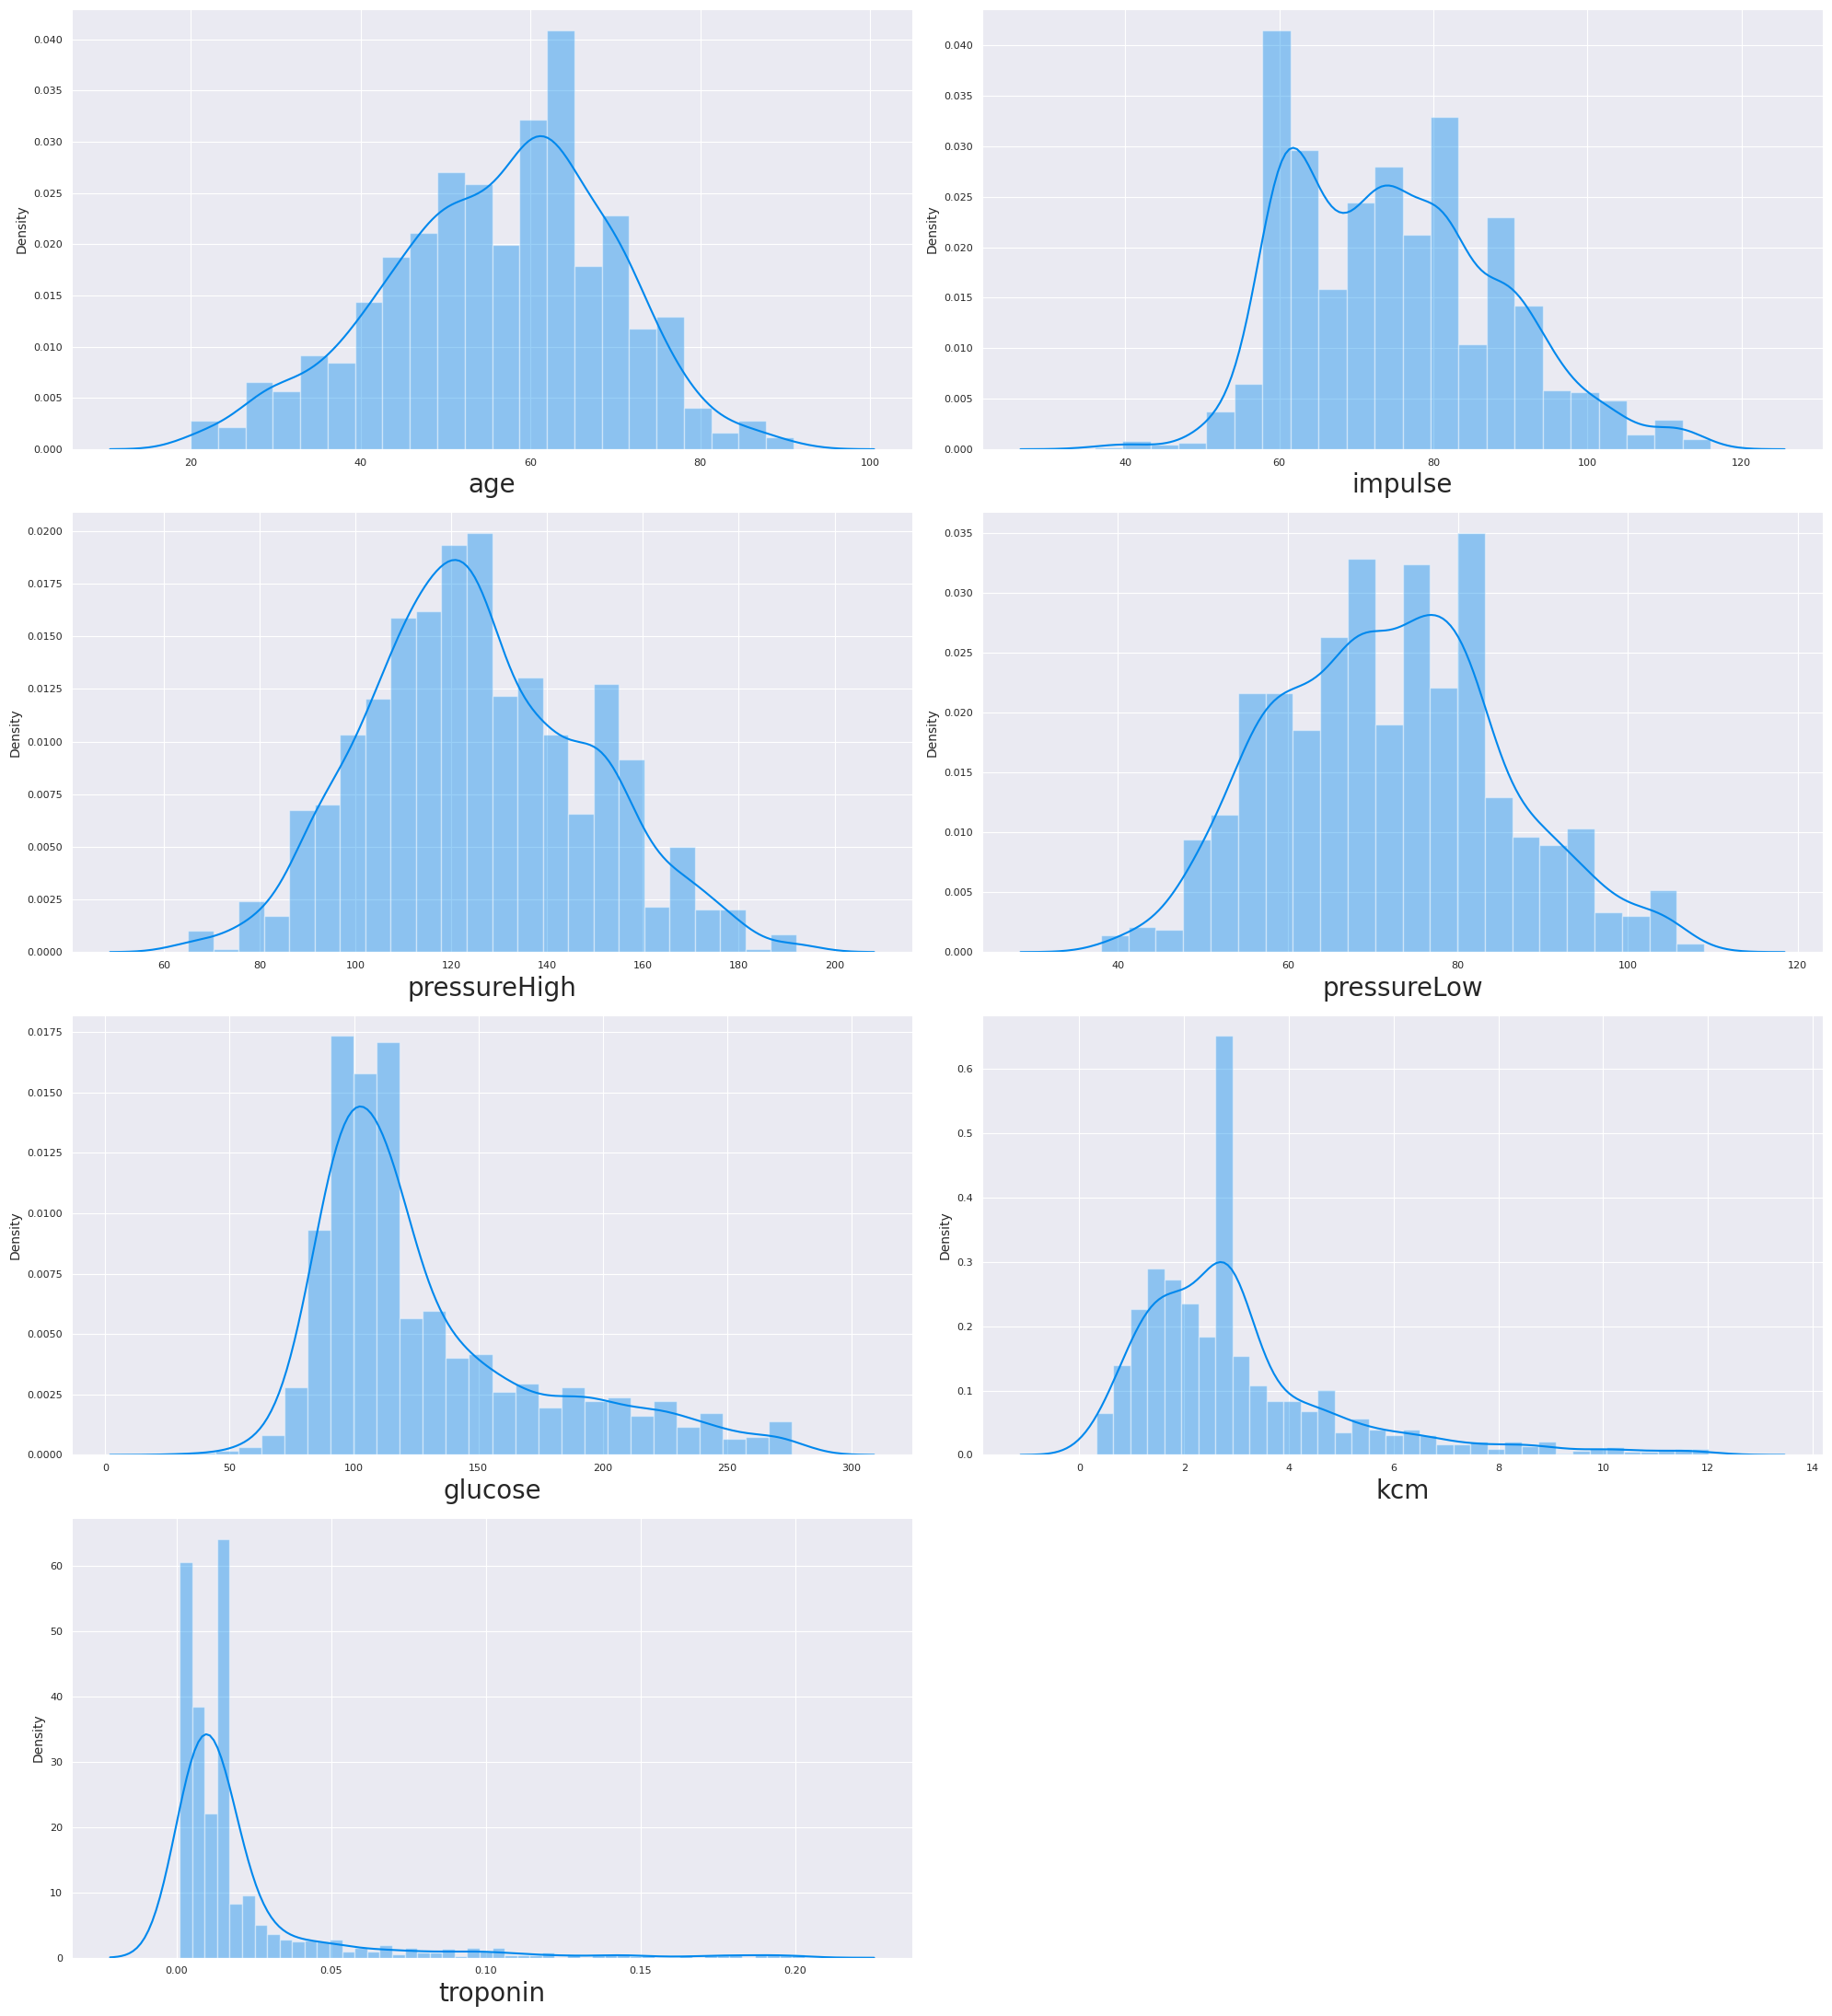

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns
out = heartData[['age', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']]

# Setting the style
sns.set_style('darkgrid')

# Defining the canvas size
plt.figure(figsize=(20, 22))

# Counter for plotting
plotno = 1

# Iterating through columns
for column in out:
    if plotno <= 7:
        plt.subplot(4, 2, plotno)  # Plotting 7 graphs (4-rows, 2-columns)
        sns.distplot(out[column])  # Plotting dist plots
        plt.xlabel(column, fontsize=20)
    plotno += 1

plt.tight_layout()
plt.show()


#### 4.FEATURE SCALING
##### STANDARD SCALING

* Standard scaling is used because of features are mesure in different units as well as some feature are followed normal distribution
* Standard scaling range : -3 to +3

In [69]:
# import library
from sklearn.preprocessing import StandardScaler

# Creating object
scale = StandardScaler()

# Scaling the feature 
heartData[['age', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']] = scale.fit_transform(heartData[['age', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']])


In [70]:
heartData.head()

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
0,0.585492,1,-0.676427,1.524500,0.841791,0.646466,-0.611087,-0.297118,0
1,-2.647939,1,1.406605,-1.196793,-1.950239,-0.302877,1.834855,-0.233776,1
2,-0.091273,1,-0.825215,1.524500,0.389029,3.019823,-0.517203,-0.582158,0
3,0.585492,1,-0.378851,-0.231172,-1.271096,3.019823,-0.092251,3.186707,1
4,-0.091273,1,-0.825215,-0.582307,-0.516494,-0.302877,-0.966861,-0.582158,0


## FEATURE SELECTION

#### 1.DROP UNIQUE AND CONSTANT COULMN

In [71]:
heartData.describe()

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
count,1.319000e+03,1319.000000,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1319.000000
mean,-1.144733e-17,0.659591,4.363454e-16,-2.693490e-17,-3.905561e-16,2.424141e-17,-8.147808e-17,-2.154792e-17,0.614102
std,1.000379e+00,0.474027,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,0.486991
min,-2.723135e+00,0.000000,-2.908247e+00,-2.645223e+00,-2.553921e+00,-2.050530e+00,-1.341905e+00,-6.455005e-01,0.000000
25%,-6.928413e-01,0.000000,-8.252149e-01,-6.700907e-01,-7.428745e-01,-6.912440e-01,-6.827360e-01,-4.871448e-01,0.000000
50%,1.343153e-01,1.000000,-8.127501e-02,-5.560518e-02,1.172809e-02,-3.028765e-01,-9.225092e-02,-2.337757e-01,1.000000
75%,6.606877e-01,1.000000,6.626649e-01,6.466640e-01,6.154102e-01,4.199184e-01,2.190508e-01,-1.070912e-01,1.000000
max,2.615785e+00,1.000000,3.043273e+00,2.929039e+00,2.803758e+00,3.149278e+00,4.438919e+00,5.752069e+00,1.000000


* No costant column avilable in dataset

#### 2. CHECKING CORRELATION

In [72]:
heartData.corr()

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
age,1.000000,-0.097935,-0.014887,0.007421,-0.002655,-0.011475,-0.058732,0.192003,0.235839
gender,-0.097935,1.000000,-0.002794,0.023935,-0.004683,-0.008933,0.026293,0.062543,0.094432
impulse,-0.014887,-0.002794,1.000000,-0.020150,0.129253,0.000986,-0.001794,0.008080,-0.012272
pressureHigh,0.007421,0.023935,-0.020150,1.000000,0.589724,0.008452,-0.004242,-0.027406,-0.038154
pressureLow,-0.002655,-0.004683,0.129253,0.589724,1.000000,0.010991,0.000422,-0.007235,-0.014703
glucose,-0.011475,-0.008933,0.000986,0.008452,0.010991,1.000000,0.019945,0.017942,-0.005091
kcm,-0.058732,0.026293,-0.001794,-0.004242,0.000422,0.019945,1.000000,-0.004476,0.188546
troponin,0.192003,0.062543,0.008080,-0.027406,-0.007235,0.017942,-0.004476,1.000000,0.372109
heart_attack,0.235839,0.094432,-0.012272,-0.038154,-0.014703,-0.005091,0.188546,0.372109,1.000000


##### using HeatMap for propper visualizations 

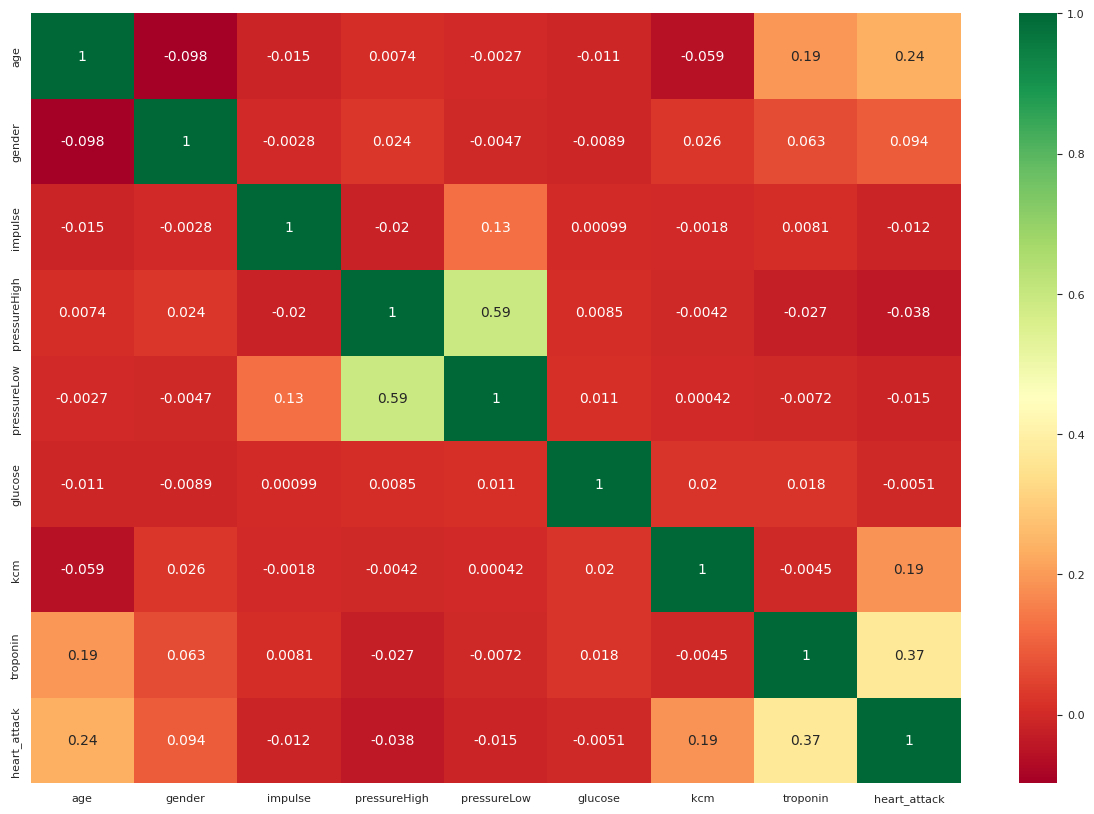

In [73]:
# Plot hitmap for better visualisation
plt.figure(figsize=(15,10))
sns.heatmap(heartData.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':10})
plt.show()

* In dataset no highly correlated feature is available.

#### 3.CHECKING DUPLICATES

In [74]:
heartData.duplicated().sum()

0

# MODEL CREATION

### AIM
1. In heart attack case recall metrix is more important so we need more focus to improve recall score
2. Create sweetspot model (Low bias & Low variance)

##### HERE WE WILL BE EXPERIMENTING WITH FOUR ALGORITHM
1. Logistic regression
2. KNeighborsClassifier
3. RandomForestClassifier
4. XGBClassifier

####  DEFINING INDEPENDANT AND DEPENDANT VERIABLE

In [75]:
X = heartData.iloc[:,:-1]
y = heartData.heart_attack

In [76]:
X.head()

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin
0,0.585492,1,-0.676427,1.524500,0.841791,0.646466,-0.611087,-0.297118
1,-2.647939,1,1.406605,-1.196793,-1.950239,-0.302877,1.834855,-0.233776
2,-0.091273,1,-0.825215,1.524500,0.389029,3.019823,-0.517203,-0.582158
3,0.585492,1,-0.378851,-0.231172,-1.271096,3.019823,-0.092251,3.186707
4,-0.091273,1,-0.825215,-0.582307,-0.516494,-0.302877,-0.966861,-0.582158


In [77]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: heart_attack, dtype: int64

#### CHECKING THE BALANCE OF TARGET VERIABLE

In [78]:
y.value_counts()

heart_attack
1    810
0    509
Name: count, dtype: int64

In [79]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = heartData[heartData['heart_attack'] == 1]
minority_class = heartData[heartData['heart_attack'] == 0]

# Oversample the minority class
minority_class_oversampled = resample(minority_class, 
                                      replace=True,     # Sample with replacement
                                      n_samples=len(majority_class),   # Match the number of majority class
                                      random_state=42)  # For reproducibility

# Combine the majority class with the oversampled minority class
balanced_data = pd.concat([majority_class, minority_class_oversampled])

# Check the class distribution
balanced_data['heart_attack'].value_counts()


heart_attack
1    810
0    810
Name: count, dtype: int64

In [80]:
y.value_counts()

heart_attack
1    810
0    509
Name: count, dtype: int64

In [81]:
balanced_data

,age,gender,impulse,pressureHigh,pressureLow,glucose,kcm,troponin,heart_attack
1,-2.647939,1,1.406605,-1.196793,-1.950239,-0.302877,1.834855,-0.233776,1
3,0.585492,1,-0.378851,-0.231172,-1.271096,3.019823,-0.092251,3.186707,1
7,0.510296,1,-1.122791,-0.055605,0.766331,-0.928580,-0.092251,-0.233776,1
12,0.585492,1,-1.122791,-0.055605,2.049155,-0.820700,0.194344,-0.233776,1
15,0.359904,1,0.439483,-0.318956,-0.441033,0.085491,-0.764267,-0.138762,1
...,...,...,...,...,...,...,...,...,...
1142,0.510296,1,1.406605,-0.889550,0.690870,0.819074,-0.719796,-0.518816,0
595,-1.595194,0,1.109029,1.085582,0.917251,-0.863852,-0.181194,-0.582158,0
1035,-0.467253,1,-0.081275,-0.055605,2.124615,2.458847,0.080695,-0.423803,0
179,0.886276,1,-0.602033,2.885147,0.011728,0.754346,-0.225666,-0.360460,0


In [82]:
X = balanced_data.iloc[:,:-1]
y = balanced_data.heart_attack

####  CREATING TRAINING AND TESTING DATA

In [83]:
# importing library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=45)

In [84]:
# check the shape of X train, y train, X test and y test
X_train.shape

(1296, 8)

In [85]:
X_test.shape

(324, 8)

In [86]:
y_train.shape

(1296,)

In [87]:
y_test.shape

(324,)

### 1.LogisticRegression

In [88]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_model = LogisticRegression()

# Step:3 Fitting the training data
log_model.fit(X_train,y_train)

# Step:4 Prediction on test data
y_log_predict = log_model.predict(X_test)

# Step:5 Prediction on training data
train_log_predict = log_model.predict(X_train)

### EVALUATION

### Training Accuracy

In [89]:
# importing library
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report
log_train_accuracy = accuracy_score(train_log_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(train_log_predict,y_train))

Training accuracy of Logistic regression model 86.41975308641975
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       670
           1       0.85      0.88      0.86       626

    accuracy                           0.86      1296
   macro avg       0.86      0.86      0.86      1296
weighted avg       0.86      0.86      0.86      1296



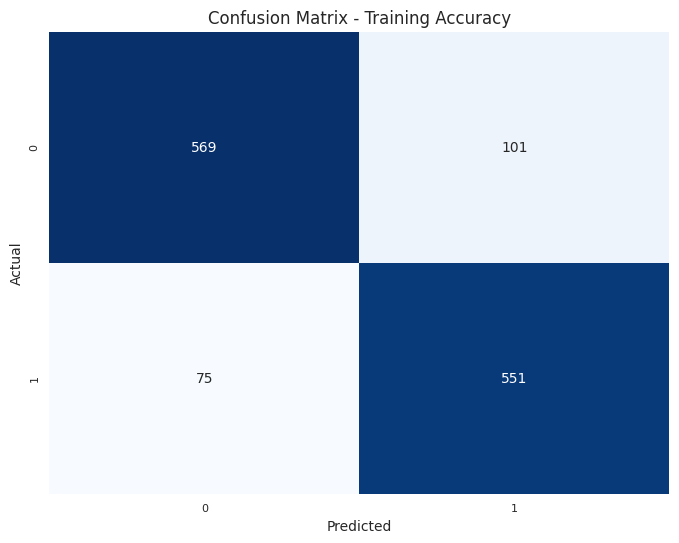

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(train_log_predict, y_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

- Precision: Precision measures the accuracy of the positive predictions. For class 0, the precision is 0.87, meaning that 87% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 0.82, indicating that 82% of the instances predicted as class 1 are actually class 1.

- Recall: Recall (also known as sensitivity) measures the ability of the model to correctly identify positive instances. For class 0, the recall is 0.85, meaning that the model correctly identifies 85% of the actual class 0 instances. For class 1, the recall is also 0.85, indicating that the model correctly identifies 85% of the actual class 1 instances.

- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.86, and for class 1, it's 0.84.

- Support: Support is the number of actual occurrences of the class in the specified dataset. For class 0, there are 78 instances, and for class 1, there are 66 instances.

### Testing Accuracy

In [91]:
log_test_accuracy = accuracy_score(y_log_predict,y_test)
print("Testing accuracy of Logistic regession model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(y_log_predict,y_test))

Testing accuracy of Logistic regession model 86.11111111111111
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       179
           1       0.82      0.89      0.85       145

    accuracy                           0.86       324
   macro avg       0.86      0.86      0.86       324
weighted avg       0.86      0.86      0.86       324



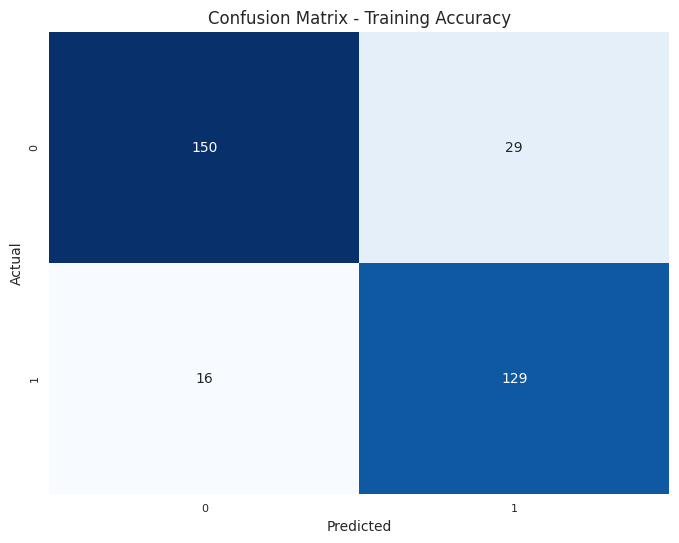

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(y_log_predict, y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

In [93]:
# In heaert disease prediction recall is more important
recall_log = recall_score(y_log_predict,y_test)
recall_log*100

88.96551724137932

In [94]:
# crosstab of logistic regression
pd.crosstab(y_log_predict,y_test)

heart_attack,0,1
row_0,,
0,150,29
1,16,129


#### USE BAGGING ON LOGISTIC REGRESSION MODEL

In [95]:
# Step:1 Create logistic regression object
log_reg1 = LogisticRegression()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(log_reg1,n_estimators=45)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(X_test)

In [96]:
bagg_recall = recall_score(bagg_predict,y_test)
print("Racall score after bagging",bagg_recall*100)

Racall score after bagging 89.04109589041096


### 2.KNeighborsClassifier

In [97]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.21604938271604937, 0.24382716049382716, 0.24074074074074073, 0.25617283950617287, 0.2222222222222222, 0.26851851851851855, 0.27469135802469136, 0.25925925925925924, 0.2716049382716049, 0.2623456790123457]


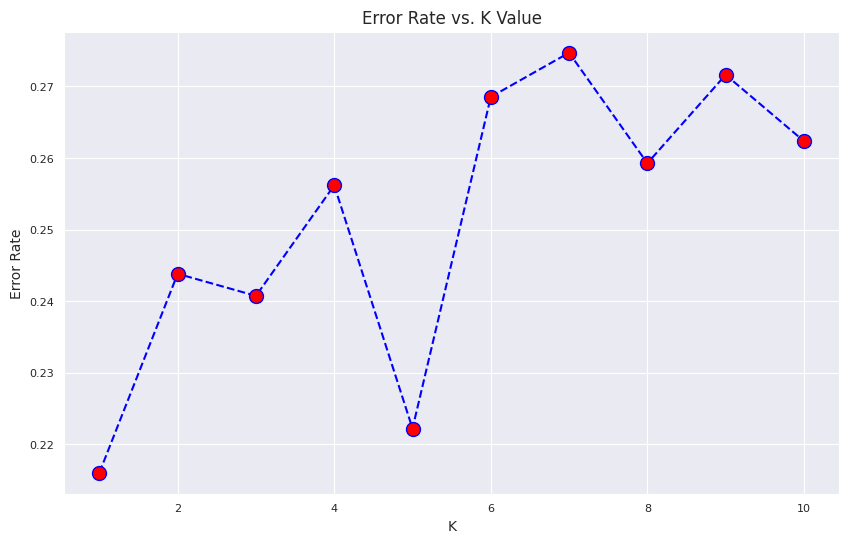

In [98]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [99]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)


### EVALUATION

#### TRAINING ACCURACY

In [100]:
knn_train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Training accuracy of knn model ",knn_train_accuracy)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))

Training accuracy of knn model  0.8819444444444444
Training classification report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       729
           1       0.82      0.94      0.87       567

    accuracy                           0.88      1296
   macro avg       0.88      0.89      0.88      1296
weighted avg       0.89      0.88      0.88      1296



#### TESTING ACCURACY

In [101]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(knn_test_predict,y_test))

Testing accuracy of knn model 75.92592592592592
Testing classification report: 
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       196
           1       0.66      0.81      0.73       128

    accuracy                           0.76       324
   macro avg       0.76      0.77      0.76       324
weighted avg       0.78      0.76      0.76       324



In [102]:
# Recall score
recall_knn = recall_score(knn_test_predict,y_test)
recall_knn*100

81.25

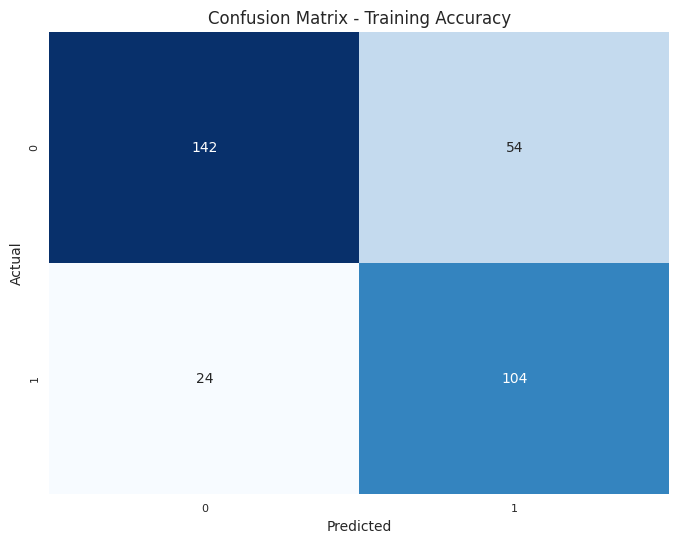

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(knn_test_predict, y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

### 3.RandomForestClassifier

In [104]:
# Step:1 importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# Step:2 fitting training data
rf.fit(X_train,y_train)

# Step:3 Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)


### EVALUATION

#### TRAINING ACCURACY

In [105]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       644
           1       1.00      1.00      1.00       652

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296



* Random forest model very well work on training data

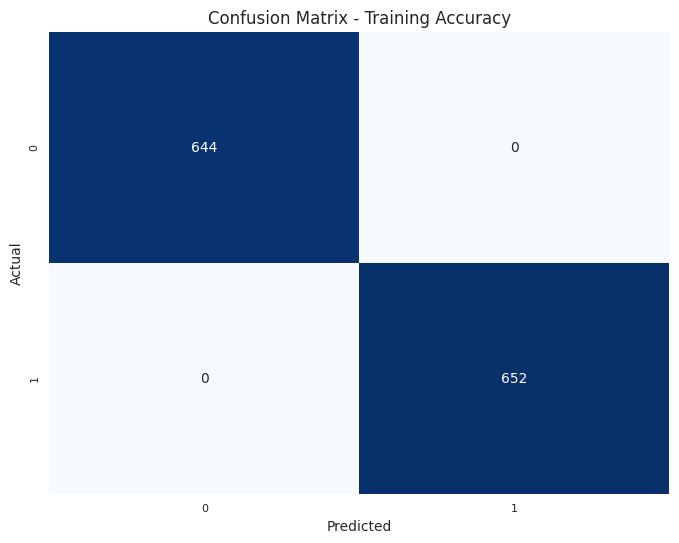

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(rf_train_predict, y_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

#### TESTING ACCURACY

In [107]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 97.53086419753086
Classification report of testing: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       170
           1       0.96      0.99      0.97       154

    accuracy                           0.98       324
   macro avg       0.97      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324



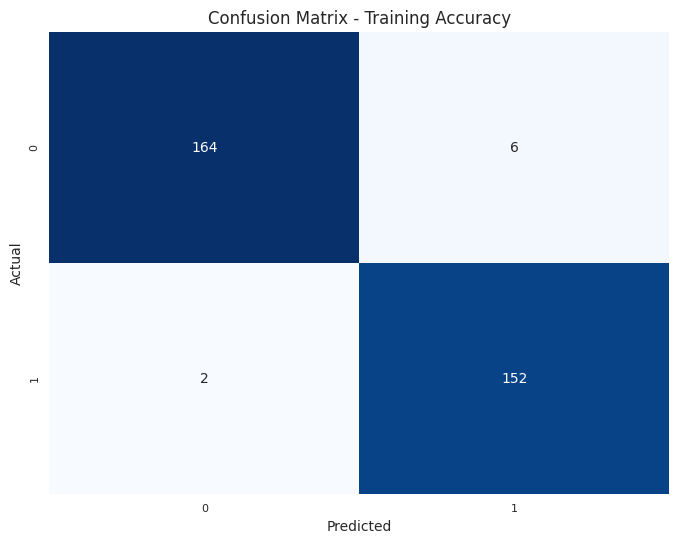

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(rf_test_predict, y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

### HYPERPARAMETER TUNNING OF RANDOM FOREST

In [109]:
# Step:1 import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,10] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4,5]  #Min number of data point allowed in leaf node

# Step:2 Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Step:3 Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Step:4 Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=20,cv=2,verbose=2,random_state=42,n_jobs=-1)

# Step:5 Fitting the training data
rf_cv.fit(X_train,y_train)

# Step:6 Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")


Fitting 2 folds for each of 20 candidates, totalling 40 fits


/home/joe/.local/share/virtualenvs/HeartDiseasePrediction-N2SPJqPk/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
26 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/joe/.local/share/virtualenvs/HeartDiseasePrediction-N2SPJqPk/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joe/.local/share/virtualenvs/HeartDiseasePrediction-N2SPJqPk/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/joe/.local/sh

Best parameter: {'n_estimators': 944, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 82}


In [110]:
# Step:7 Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Step:8 Fitting the training data
rf_clf1.fit(X_train,y_train)

# Step:9 Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)


### EVALUATION

In [111]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 96.60493827160494
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       167
           1       0.96      0.97      0.97       157

    accuracy                           0.97       324
   macro avg       0.97      0.97      0.97       324
weighted avg       0.97      0.97      0.97       324



In [112]:
rf_recall_score = recall_score(rf_clf1_predict,y_test)
print("Recall score:",rf_recall_score*100)

Recall score: 96.81528662420382


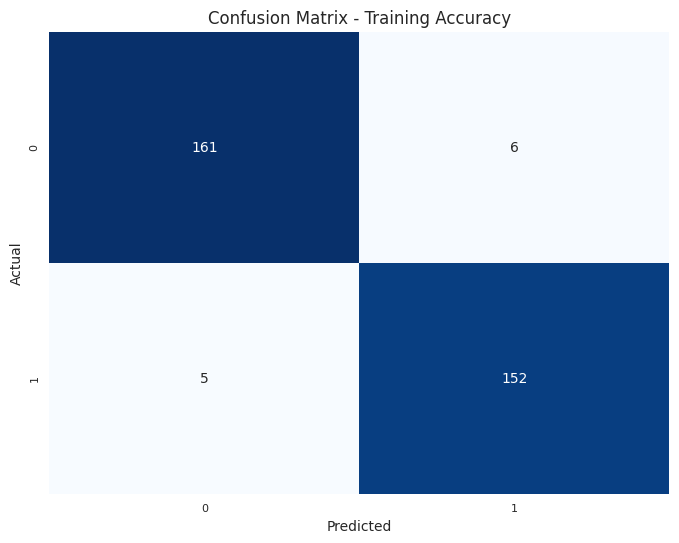

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(rf_clf1_predict, y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

### 4.XGBClassifier

In [114]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

### EVALUATION

#### TRAINING ACCURACY

In [115]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 1.0
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       644
           1       1.00      1.00      1.00       652

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296



* XG boost model is very well work on training data

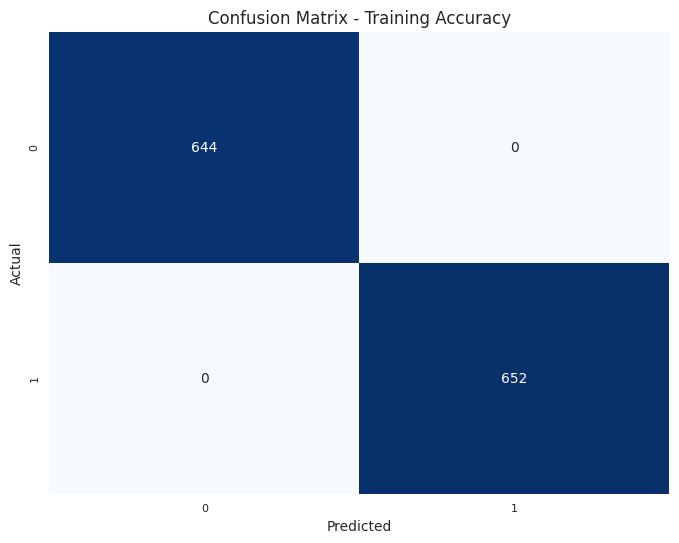

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(xgb_train_predict,y_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

#### TESTING ACCURACY

In [117]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 99.07407407407408
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       165
           1       0.99      0.99      0.99       159

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



In [118]:
xgb_recall_score = recall_score(xgb_test_predict,y_test)
print("Recall score:",xgb_recall_score*100)

Recall score: 98.74213836477988


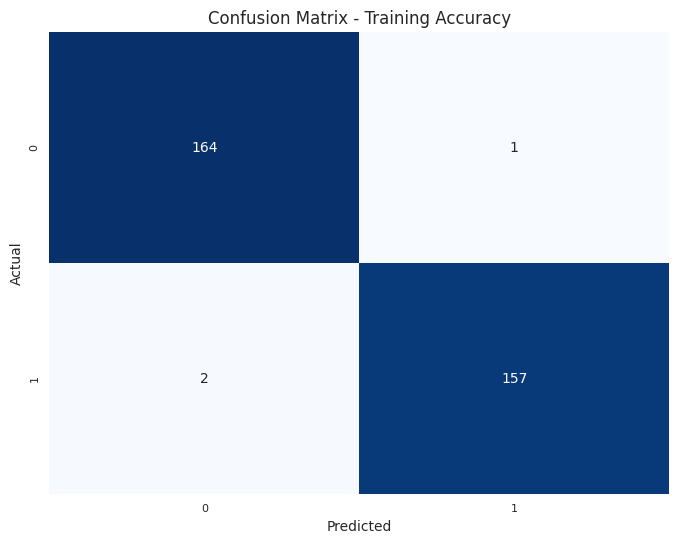

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(xgb_test_predict,y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

### HYPERPARAMETER TUNNING OF XG BOOST

In [120]:
# Step:1 import library 
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.001,0.01,0.1, 0.03, 0.06, 0.1, 0.15, 0.02, 0.25,0.003,0.0003, 0.3,0.04, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.01,0.1,0.02,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Step:2 Object creation with parameter
XGB = XGBClassifier(random_state=42)

# Step:3 Create randomized search cv with parameter
rcv = RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=60,
                        cv=4,verbose=2,random_state=42,n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

# Step:4 Fitting training data on randomized search cv
rcv.fit(X_train,y_train)

# Step:5 Get best parameters
rcv_best_parameter = rcv.best_params_
print(f"Best parameter: {rcv_best_parameter}")


Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV] END max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1366; total time=   0.0s
[CV] END max_depth=82, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=944; total time=   3.1s
[CV] END max_depth=55, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=311; total time=   1.3s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=944; total time=   3.4s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=522; total time=   1.8s
[CV] END gamma=12.8, learning_rate=0.06, max_depth=13, n_estimators=150, reg_alpha=12.8, reg_lambda=12.8; total time=   0.1s
[CV] END gamma=51.2, learning_rate=0.1, max_depth=12, n_estimators=115, reg_alpha=3.2, re

In [121]:
# Step:6 Place the best parameter
XGB2 = XGBClassifier(reg_lambda=12.8,reg_alpha=0.4,n_estimators=115,max_depth=9,learning_rate=0.7,gamma=0.1)

# Step:7 Fitting the training data
XGB2.fit(X_train,y_train)

# Step:8 Prediction on testing data
XGB_prediction = XGB2.predict(X_test)

### EVALUATION

In [122]:
XGB_accuracy = accuracy_score(XGB_prediction,y_test)
print("Accuracy score after hyperparameter tunning",XGB_accuracy*100)
print("Classification report: \n",classification_report(XGB_prediction,y_test))

Accuracy score after hyperparameter tunning 98.14814814814815
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       164
           1       0.99      0.97      0.98       160

    accuracy                           0.98       324
   macro avg       0.98      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324



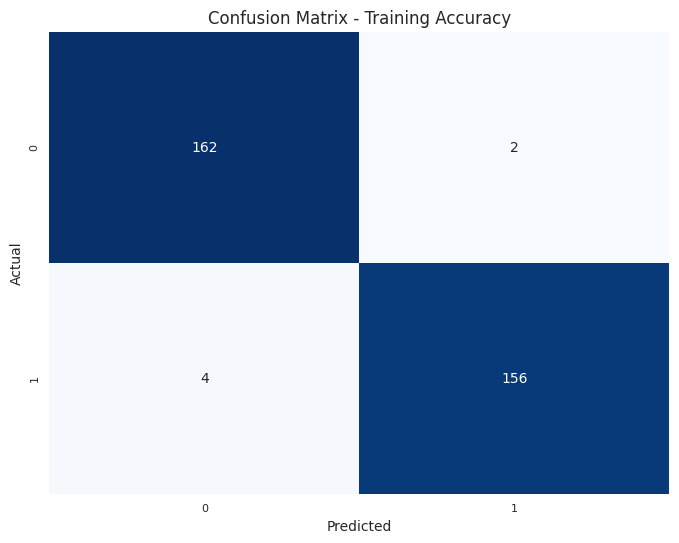

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(XGB_prediction,y_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Accuracy')
plt.show()

In [124]:
XGB_recall = recall_score(XGB_prediction,y_test)
print("Recall Score",XGB_recall*100)

Recall Score 97.5


In [125]:
rf_clf1

RandomForestClassifier(max_depth=82, min_samples_leaf=2, n_estimators=944)

In [126]:
rf

RandomForestClassifier()

In [127]:
# Saving the Random forest Model using pickle
import pickle

file = open("RFMModelPredict.pkl","wb")
# Dump information to file
pickle.dump(rf,file)

In [128]:
# Saving XGBoost Model using pickle

# file = open("XGBoostModelPredict.pkl","wb")
# # Dump information to file
# pickle.dump(xgb,file)

In [129]:
import joblib

In [130]:
joblib.dump(rf,'randomForest.pkl')

['randomForest.pkl']

In [156]:
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the model
model = joblib.load(open("randomForest.pkl","rb")) # open model in read mode

# Start Preprocessing
standard_to = StandardScaler()

def predict():
    # Define input features with named columns
    # input_data = np.array([[58, 1, 74, 124, 72, 116, 15, 0.4]])
    input_data = np.array([[58,0,61,112,58,87,1.83,0.004]])

    feature_names = ['age', 'gender', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']

    # Scale the input data
    # input_scaled = standard_to.fit_transform(input_data)

    # Predict using the model
    prediction = model.predict(input_data)
    output = round(prediction[0],2) # Predict the model with condition

    # Output the prediction with feature names
    print(output)
    # if prediction == 0:
    #     print("No Heart Attack is to be expected")
    # else:
    #     print("You might have a Heart attack in the future")

    # # Print feature namaes and values
    # print("Feature Names:", feature_names)
    # print("Input Values:", input_data.flatten())


In [157]:
predict()

1


/home/joe/.local/share/virtualenvs/HeartDiseasePrediction-N2SPJqPk/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [133]:
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
XGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [135]:
XGB2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=115, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [136]:
xgb.save_model('xgboost_model.xgb');

/home/joe/.local/share/virtualenvs/HeartDiseasePrediction-N2SPJqPk/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:11:37] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [137]:
xgboost.Booster()

In [148]:
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the model
# model = joblib.load(open("randomForest.pkl","rb")) # open model in read mode
model = xgboost.Booster();
model.load_model('xgboost_model.xgb');

# Start Preprocessing
standard_to = StandardScaler()

def predict():
    # Define input features with named columns
    # input_data = np.array([[58, 1, 74, 124, 72, 116, 15, 0.4]])
    input_data = np.array([[58,0,61,112,58,87,1.83,0.004]])
    # input_data = np.array([[5, 0, 90, 100, 60, 80, 30, 0.1]])


    feature_names = ['age', 'gender', 'impulse', 'pressureHigh', 'pressureLow', 'glucose', 'kcm', 'troponin']

    # Scale the input data
    input_scaled = standard_to.fit_transform(input_data)
    # input_data_xgb = xgboost.DMatrix(input_scaled);
    input_data_xgb = xgboost.DMatrix(input_data);
    # Predict using the model
    prediction = model.predict(input_data_xgb)

    # Output the prediction with feature names
    # if prediction == 0:
    #     print("No Heart Attack is to be expected")
    # else:
    #     print("You might have a Heart attack in the future")
    print(prediction)


In [149]:
predict()

[0.99952817]
